In [131]:
# Perform imports here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pytz import timezone
from sqlalchemy import create_engine
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import gc
from joblib import Parallel, delayed
import joblib
import matplotlib.pyplot as plt

In [22]:
df = pd.read_pickle("OLI_SELL.pk")
#df = pd.read_pickle("GSS_SELL.pk")
#df = pd.read_pickle("HMA_SELL.pk")

In [23]:
df = df[df.SELL_AMOUNT<500]
sell = df.groupby(["BRAND", "ITEM_ID"]).SELL_AMOUNT.sum()

In [24]:
sell = sell.reset_index().sort_values("SELL_AMOUNT", ascending=False)

In [25]:
df[(df.ITEM_ID == 1907459)]

Empty DataFrame
Columns: [SELL_AMOUNT, STOCK_AMOUNT, REVISE_STOCK_AMOUNT, STOCK_ID, ITEM_ID, UPT_DT, COLLECT_DAY, UPT_ID, REG_DT, ITEM_NUM, GOODS_NAME, COLLECT_URL, NORMAL_PRICE_SITE, BRAND_NAME, SITE_NO, CATE_NAMES, BRAND, SELL]
Index: []

In [26]:
target = df[df.ITEM_ID.isin(sell.ITEM_ID)].drop_duplicates("ITEM_ID")[[
    "ITEM_ID", "STOCK_ID", "ITEM_NUM", "GOODS_NAME", "NORMAL_PRICE_SITE", "BRAND_NAME", "CATE_NAMES", "BRAND", "SITE_NO", "COLLECT_URL"]]
target = target.merge(sell[["ITEM_ID", "SELL_AMOUNT"]], on="ITEM_ID").sort_values("SELL_AMOUNT", ascending=False)

In [1]:
target1 = target[target.BRAND=='AP']
target2 = target[target.BRAND=='LG']
target3 = target[target.BRAND=='LOREAL']
target4 = target[target.BRAND=='LVMH']
target5 = target[target.BRAND=='init']

NameError: name 'target' is not defined

In [28]:
target = pd.concat([target1, target2, target3, target4, target5])

In [29]:
target.to_pickle("OLI_top30.pk")

In [3]:
OLI = pd.read_pickle("OLI_top30.pk")
GSS = pd.read_pickle("GSS_top30.pk")
HMA = pd.read_pickle("HMA_top30.pk")

In [6]:
OLI

ITEM_ID              STOCK_ID       ITEM_NUM  \
5627  11923707   2646370647996787210  A000000114672   
5978   8759170  -2380961771101207379  A000000012067   
6776   8759330   2897745575824923404  A000000010983   
5308   8759166  -5937006296898590736  A000000011230   
3751  11923705   8574876233067098027  A000000114676   
4291   8758596   8700505642289419951  A000000013207   
7049   8758564   6820660122304030564  A000000111024   
6065   8762235  -1411500026508621227  A000000015329   
3611   9944755   1541328809705414679  A000000113163   
2310   8759165   3250171506429662980  A000000010986   
5902   9662933   2505574186311540029  A000000113127   
4820   9212660  -5746085421776861534  A000000112840   
5746  11923710   3571236492955933246  A000000114675   
5013   8759464   1020085762085385296  A000000105056   
3787   8759328   3770697168986417325  A000000010081   
3177  11961835   1699909424279004229  A000000114619   
958    8762822   -668682476486979112  A000000010054   
1035   8764744   1960808681764379901  A000000111760   
2594   8764345   4360914179457764294  A000000104027   
1141   8759567  -3046802700762836281  A000000105066   
5382   8902347   -873439889613219823  A000000103294   
3676   8759331   2671790019759450351  A000000012015   
1779   8759345   1849562920128740025  A000000015138   
3791   8762212   7136982116295492320  A000000108100   
4851   8759355  -3220481438114246130  A000000007790   
1092   8759566  -5094231014610565969  A000000105057   
2117   8764249  -6423032211122146659  A000000105554   
173   11923709  -6503364002736272270  A000000114671   
4424   8758997  -1139777171663550833  A000000112312   
6779   8760778   4340607977430154532  A000000106139   
...        ...                   ...            ...   
1695   8759976  -4460980375482278003  A000000014172   
3856  11864183   2200295319402959191  A000000114320   
4193   8759046   4054023419577835519  A000000104206   
4033   8758178    191124212206654503  A000000014652   
890    8758445  -3941522263856717071  A000000012780   
351    8758992  -5665576937337429154  A000000103693   
357    8757905  -7781438060327947939  A000000014563   
4711   8758180   4526633130759568015  A000000010892   
2666   9926306  -5615342086726229125  A000000113308   
6167   8758250  -8730317860915102638  A000000005797   
3248   8758186   7723012754606525909  A000000014644   
1111  11923622  -7605466920375081323  A000000114740   
3997   8759498   3432476227861858518  A000000017128   
744    8762077   8713015256227992824  A000000014284   
995    8759043  -3965193643067625510  A000000105104   
6858   8800527   3937171422139674916  A000000102550   
3003   8757853   4439649319600267274  A000000111809   
393    8758088   4803793515019005975  A000000011596   
6090   8758985   -419716858287804356  A000000005351   
1426  11547440   8518890998648630588  A000000113669   
1179   8759112   6286143550673816422  A000000105165   
4648   8757845   6865025865787199318  A000000013194   
6357   8758410   4919758846992755862  A000000111968   
97     8902304   8799862094834035384  A000000102817   
2786   8757833   3744111053616491190  A000000104007   
5740   8758986  -4953149348835649825  A000000007348   
6425  11961839   4184330573197798706  A000000114519   
50     8759030  -5999727756922636115  A000000111940   
6304   8836301  -4416025396974642376  A000000014707   
6916   8758187  -8500567593688549843  A000000000875   

                                      GOODS_NAME  NORMAL_PRICE_SITE  \
5627                     마몽드 로즈워터 토너 250ml (new)              15000   
5978                       미쟝센 퍼펙트세럼 기획 70ml 1+1              13000   
6776                        미쟝센 퍼펙트리페어 마스크팩 15ml               4000   
5308                       미쟝센 컬링 에센스2X굵은컬 150ml              10000   
3751                        마몽드 캐모마일 퓨어 토너 250ml              15000   
4291                         일리윤 세라마이드아토로션 350ML              20000   
7049                    일리윤 세라마이드 아토로션 대용량 528ML              30000   
6065            해피바스 자몽에센스바디

In [57]:
res = pd.concat([OLI, GSS, HMA])

In [16]:
res[res.BRAND == 'AP'].sort_values("SELL_AMOUNT", ascending=False).to_csv("AP.csv", sep="\t")
res[res.BRAND == 'LG'].sort_values("SELL_AMOUNT", ascending=False).to_csv("LG.csv", sep="\t")
res[res.BRAND == 'LOREAL'].sort_values("SELL_AMOUNT", ascending=False).to_csv("LOREAL.csv", sep="\t")
res[res.BRAND == 'LVMH'].sort_values("SELL_AMOUNT", ascending=False).to_csv("LVMH.csv", sep="\t")
res[res.BRAND == 'init'].sort_values("SELL_AMOUNT", ascending=False).to_csv("etc.csv", sep="\t")
res.sort_values("SELL_AMOUNT", ascending=False)[:100].to_csv("total.csv", sep="\t")

In [78]:
res.groupby("SITE_NO").size()

SITE_NO
1    500
3    500
4    485
dtype: int64

# 0802 크롤 정보

In [79]:
target1 = res[(res.BRAND == 'LOREAL')&(res.SITE_NO==1)].sort_values("SELL_AMOUNT", ascending=False)[:50]
target2 = res[(res.BRAND == 'LOREAL')&(res.SITE_NO==3)].sort_values("SELL_AMOUNT", ascending=False)[:50]
target3 = res[(res.BRAND == 'LOREAL')&(res.SITE_NO==4)].sort_values("SELL_AMOUNT", ascending=False)[:50]

In [9]:
OLI1 = pd.read_pickle("OLI_SELL.pk")
GSS1 = pd.read_pickle("GSS_SELL.pk")
HMA1 = pd.read_pickle("HMA_SELL.pk")
data = pd.concat([OLI1,GSS1,HMA1])

In [124]:
final1 = pd.DataFrame(columns=["GOODS_NAME", "CRAWL_FREQ", "MAX_FREQ", "OPTIONS"])
for index, row in target1.iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    temp2 = temp[-temp.STOCK_AMOUNT.isnull()].groupby("COLLECT_DAY").STOCK_ID.nunique()
    temp3 = temp2.index.day
    res1 = round((temp3.max() - temp3.min())/temp2.shape[0],4)
    res2 = (temp3[1:] - temp3[:len(temp3)-1]).max()
    res3 = temp.STOCK_ID.nunique()
    #print(row.GOODS_NAME, res1, res2, res3, sep="\t")
    final1.loc[index] = [row.GOODS_NAME, res1, res2, res3]
    
final2 = pd.DataFrame(columns=["GOODS_NAME", "CRAWL_FREQ", "MAX_FREQ", "OPTIONS"])
for index, row in target2.iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    temp2 = temp[-temp.STOCK_AMOUNT.isnull()].groupby("COLLECT_DAY").STOCK_ID.nunique()
    temp3 = temp2.index.day
    res1 = round((temp3.max() - temp3.min())/temp2.shape[0],4)
    res2 = (temp3[1:] - temp3[:len(temp3)-1]).max()
    res3 = temp.STOCK_ID.nunique()
    #print(row.GOODS_NAME, res1, res2, res3, sep="\t")
    final2.loc[index] = [row.GOODS_NAME, res1, res2, res3]
    
final3 = pd.DataFrame(columns=["GOODS_NAME", "CRAWL_FREQ", "MAX_FREQ", "OPTIONS"])
for index, row in target3.iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    temp2 = temp[-temp.STOCK_AMOUNT.isnull()].groupby("COLLECT_DAY").STOCK_ID.nunique()
    temp3 = temp2.index.day
    res1 = round((temp3.max() - temp3.min())/temp2.shape[0],4)
    res2 = (temp3[1:] - temp3[:len(temp3)-1]).max()
    res3 = temp.STOCK_ID.nunique()
    #print(row.GOODS_NAME, res1, res2, res3, sep="\t")
    final3.loc[index] = [row.GOODS_NAME, res1, res2, res3]

In [125]:
final1 = final1.assign(SITE="GSSHOP")
final2 = final2.assign(SITE="HMALL")
final3 = final3.assign(SITE="OLIVEYOUNG")
final = pd.concat([final1, final2, final3])

In [126]:
final.to_csv("0802IRI.txt", sep="\t")

## 그림 놀이

In [215]:
target1[target1.GOODS_NAME.isin(['[메이블린 뉴욕] 슈퍼스테이 립잉크+타투브로우+매그넘 마스카라'])]

ITEM_ID     STOCK_ID  ITEM_NUM                          GOODS_NAME  \
42336  12789993  31829590001  31829590  [메이블린 뉴욕] 슈퍼스테이 립잉크+타투브로우+매그넘 마스카라   

       NORMAL_PRICE_SITE BRAND_NAME CATE_NAMES   BRAND  SITE_NO  \
42336              32400    메이블린 뉴욕    메이크업>아이  LOREAL        1   

                                           COLLECT_URL  SELL_AMOUNT  
42336  http://www.gsshop.com/prd/prd.gs?prdid=31829590        583.0

In [219]:
target1[target1.GOODS_NAME.isin(final1[final1.MAX_FREQ==1].GOODS_NAME)]

ITEM_ID     STOCK_ID  ITEM_NUM                          GOODS_NAME  \
42336  12789993  31829590001  31829590  [메이블린 뉴욕] 슈퍼스테이 립잉크+타투브로우+매그넘 마스카라   
11562  12789994  31825324001  31825324  [메이블린 뉴욕] 슈퍼 스테이 립 잉크 2종 세트 (색상선택)   

       NORMAL_PRICE_SITE BRAND_NAME CATE_NAMES   BRAND  SITE_NO  \
42336              32400    메이블린 뉴욕    메이크업>아이  LOREAL        1   
11562              22400    메이블린 뉴욕     메이크업>립  LOREAL        1   

                                           COLLECT_URL  SELL_AMOUNT  
42336  http://www.gsshop.com/prd/prd.gs?prdid=31829590        583.0  
11562  http://www.gsshop.com/prd/prd.gs?prdid=31825324        332.0

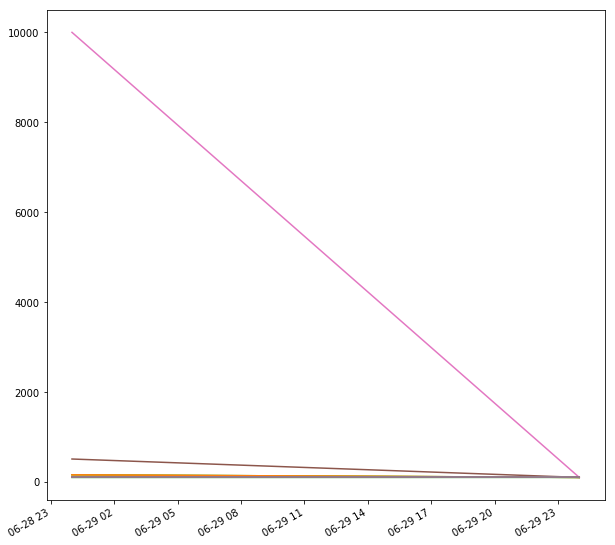

In [225]:
for index, row in target1[target1.GOODS_NAME.isin(final1[final1.MAX_FREQ==1].GOODS_NAME)].iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    plt.figure(figsize=(10,10))
    for _, group in temp.groupby('STOCK_ID'):
        group = group[-group.STOCK_AMOUNT.isnull()]
        plt.plot(pd.to_datetime(group.COLLECT_DAY), group.STOCK_AMOUNT)
    plt.gcf().autofmt_xdate()
    plt.show()
    break

In [226]:
temp

SELL_AMOUNT STOCK_AMOUNT REVISE_STOCK_AMOUNT     STOCK_ID   ITEM_ID  \
2012986           0          100                 100  31829590001  12789993   
2012987           0          100                 100  31829590001  12789993   
2012988           0          100                 100  31829590002  12789993   
2012989           0          100                 100  31829590002  12789993   
2012990           0          158                 158  31829590003  12789993   
2012991          58          100                 100  31829590003  12789993   
2012992           0          100                 100  31829590004  12789993   
2012993           0          100                 100  31829590004  12789993   
2012994           0          100                 100  31829590005  12789993   
2012995           0          100                 100  31829590005  12789993   
2012996           0          100                 100  31829590006  12789993   
2012997           0          100                 100  31829590006  12789993   
2012998           0          100                 100  31829590007  12789993   
2012999           0          100                 100  31829590007  12789993   
2013000           0          100                 100  31829590008  12789993   
2013001           0          100                 100  31829590008  12789993   
2013002           0           99                  99  31829590009  12789993   
2013003           0           99                  99  31829590009  12789993   
2013004           0          100                 100  31829590010  12789993   
2013005           0          100                 100  31829590010  12789993   
2013006           0          100                 100  31829590011  12789993   
2013007           0          100                 100  31829590011  12789993   
2013008           0          100                 100  31829590012  12789993   
2013009           0          100                 100  31829590012  12789993   
2013010           0          100                 100  31829590013  12789993   
2013011           0          100                 100  31829590013  12789993   
2013012           0          100                 100  31829590014  12789993   
2013013           0          100                 100  31829590014  12789993   
2013014           0          100                 100  31829590015  12789993   
2013015           0          100                 100  31829590015  12789993   
...             ...          ...                 ...          ...       ...   
2013052           0          100                 100  31829590034  12789993   
2013053           0          100                 100  31829590034  12789993   
2013054           0          100                 100  31829590035  12789993   
2013055           0          100                 100  31829590035  12789993   
2013056           0          100                 100  31829590036  12789993   
2013057           0          100                 100  31829590036  12789993   
2013058           0          100                 100  31829590037  12789993   
2013059           0          100                 100  31829590037  12789993   
2013060           0          100                 100  31829590038  12789993   
2013061           0          100                 100  31829590038  12789993   
2013062           0          100                 100  31829590039  12789993   
2013063           0          100                 100  31829590039  12789993   
2013064           0           99                  99  31829590040  12789993   
2013065           0           99                  99  31829590040  12789993   
2013066           0          100                 100  31829590041  12789993   
2013067           0          100                 100  31829590041  12789993   
2013068           0          100                 100  31829590042  12789993   
2013069           0          100                 100  31829590042  12789993   
2013070           0           99                  99  3182

/home/aron/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


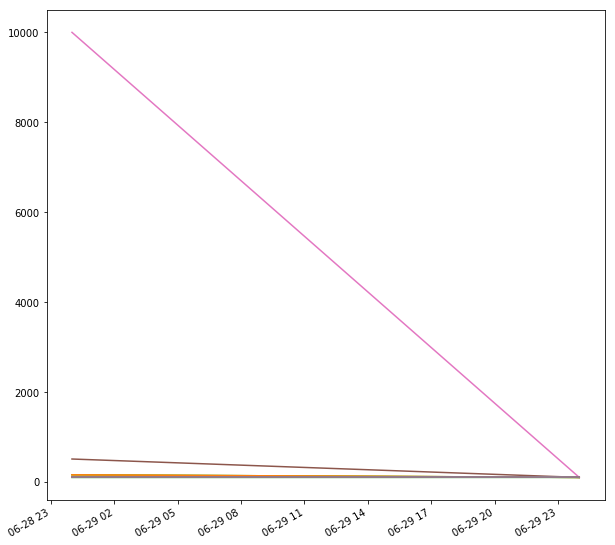

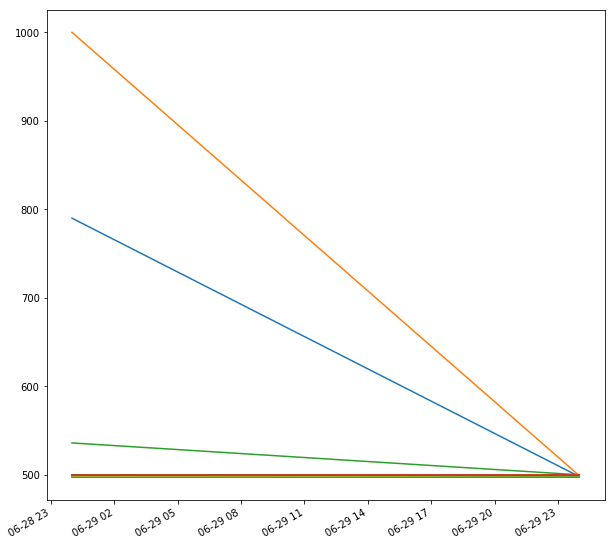

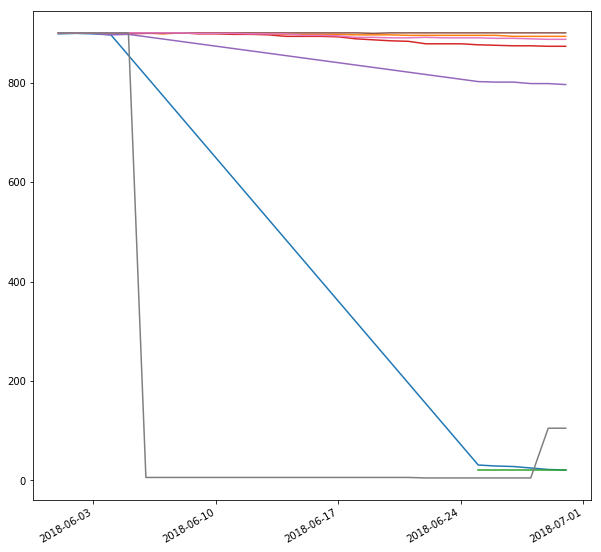

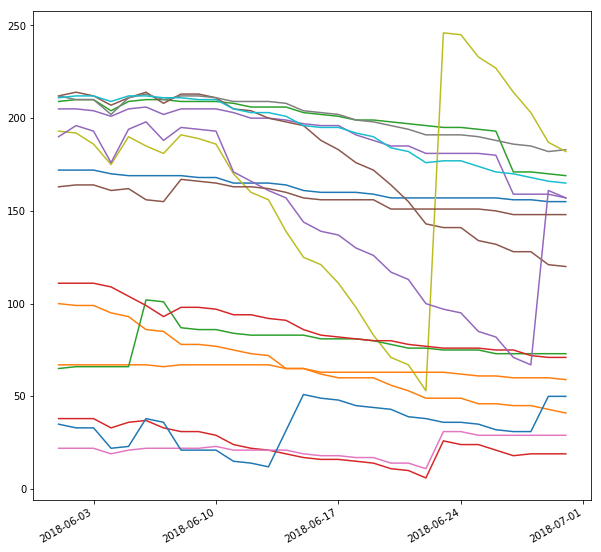

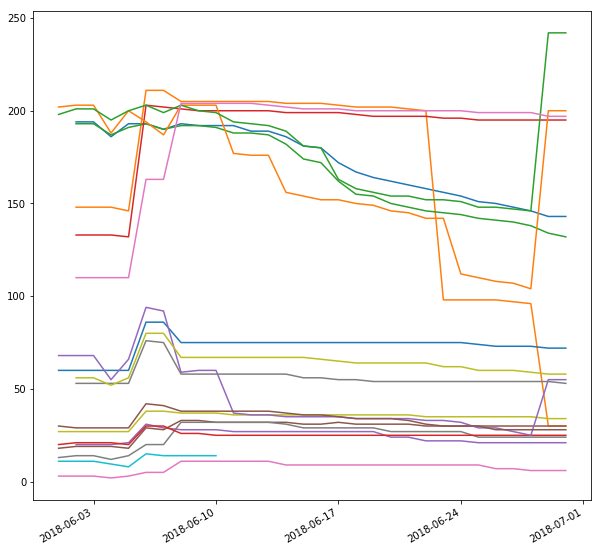

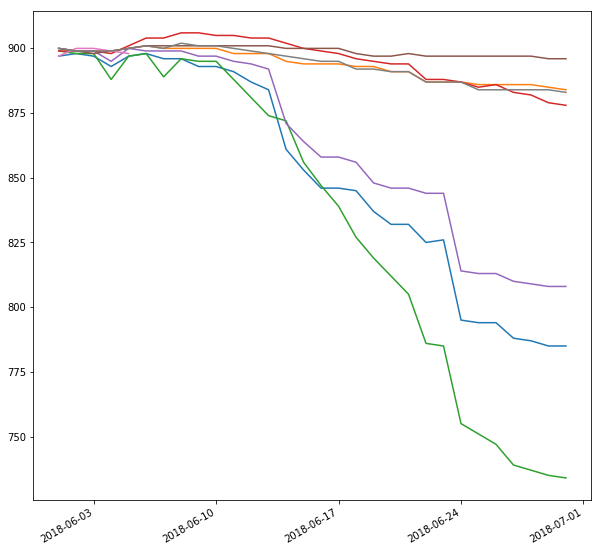

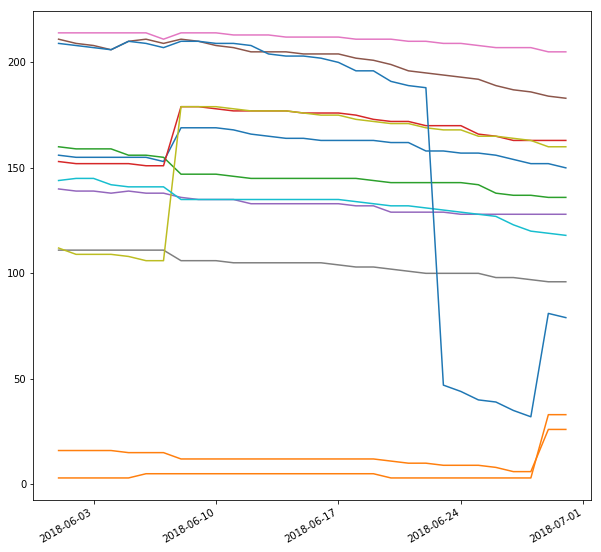

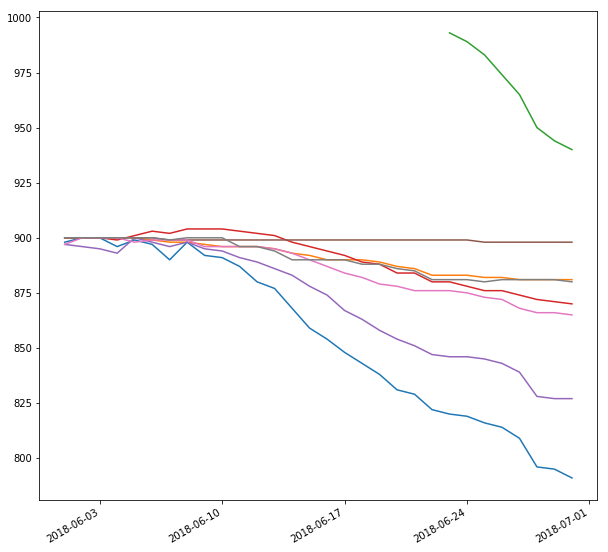

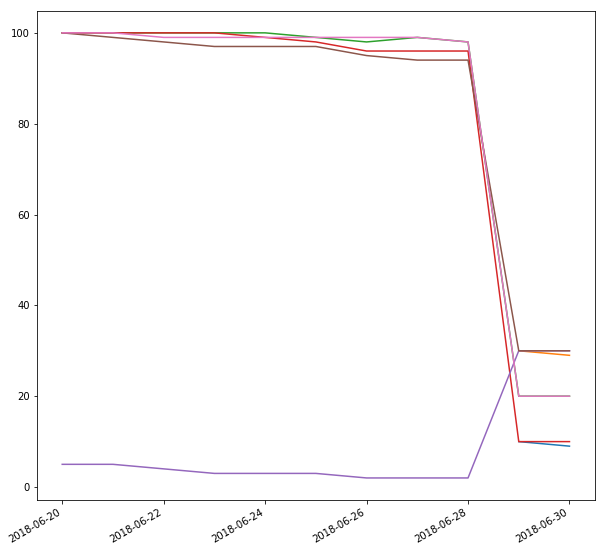

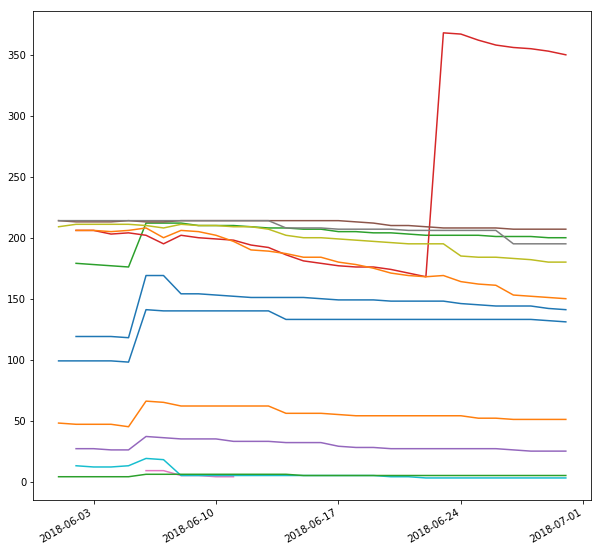

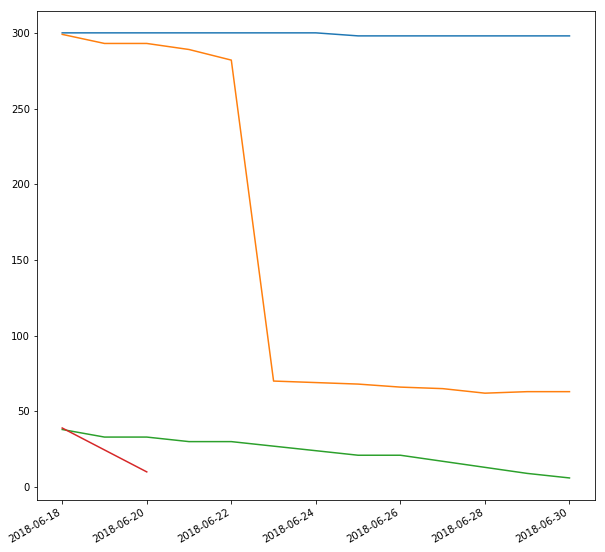

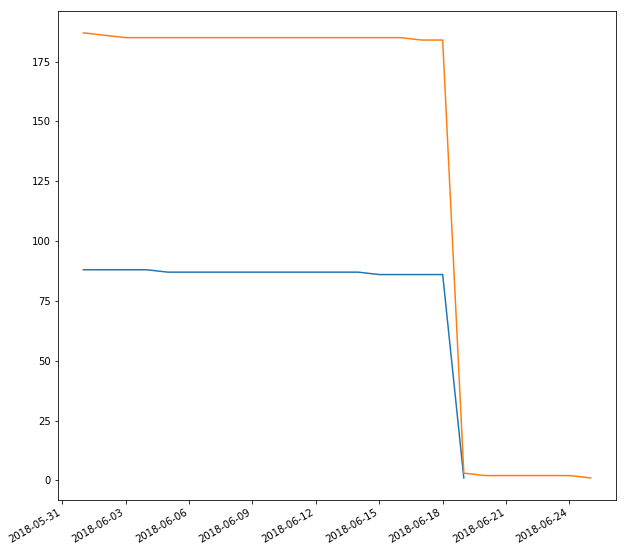

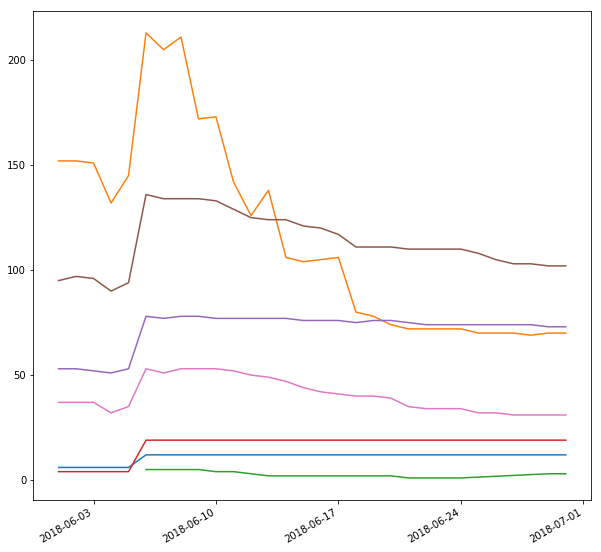

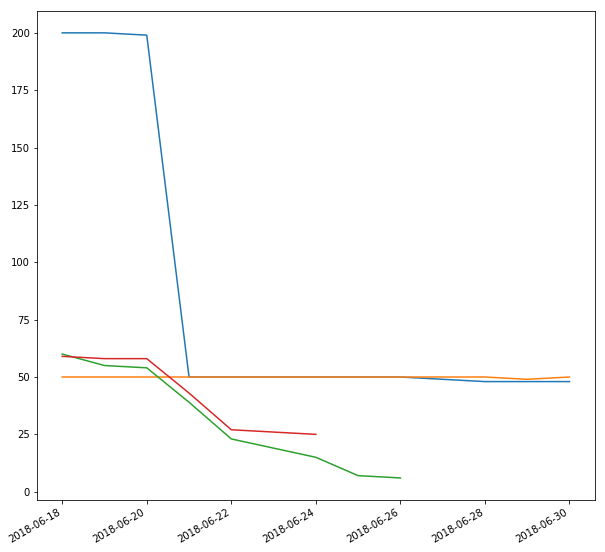

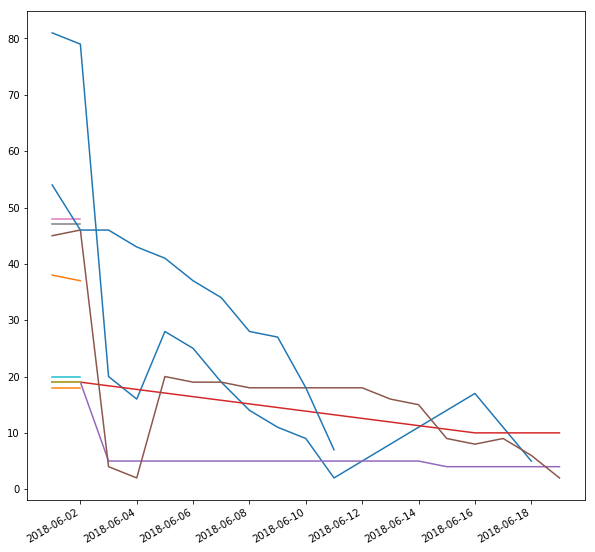

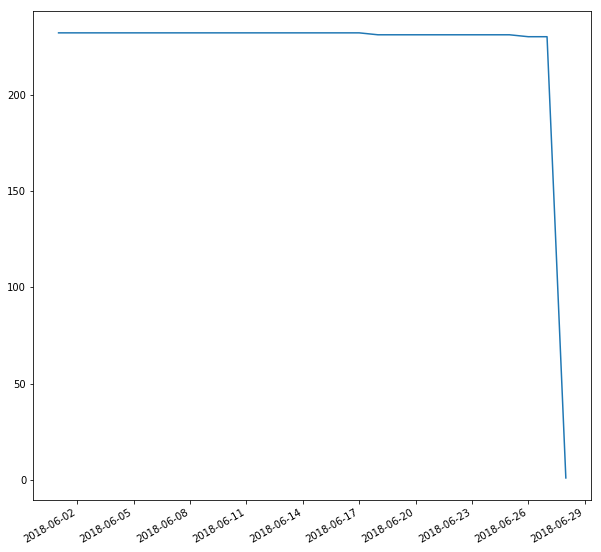

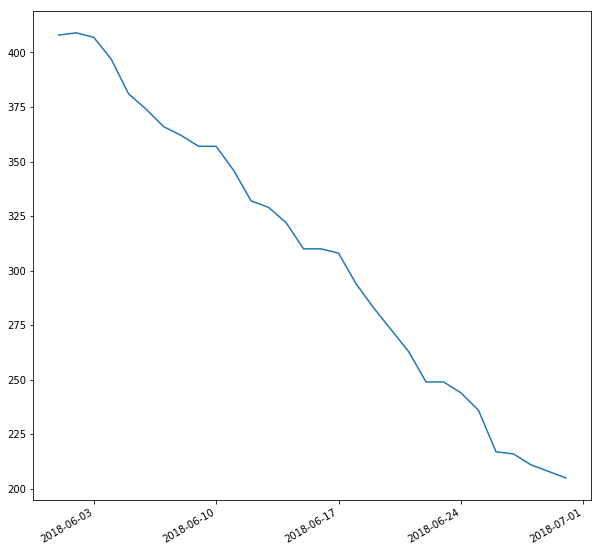

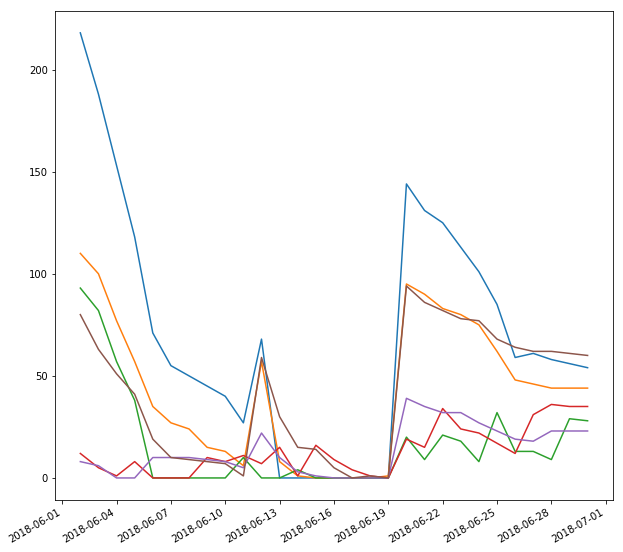

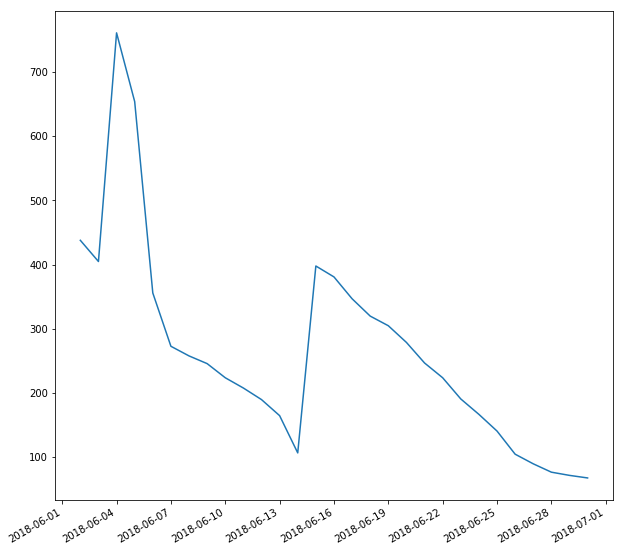

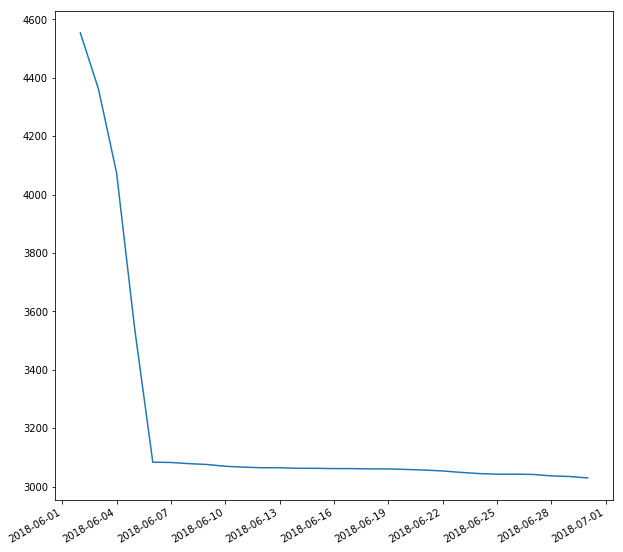

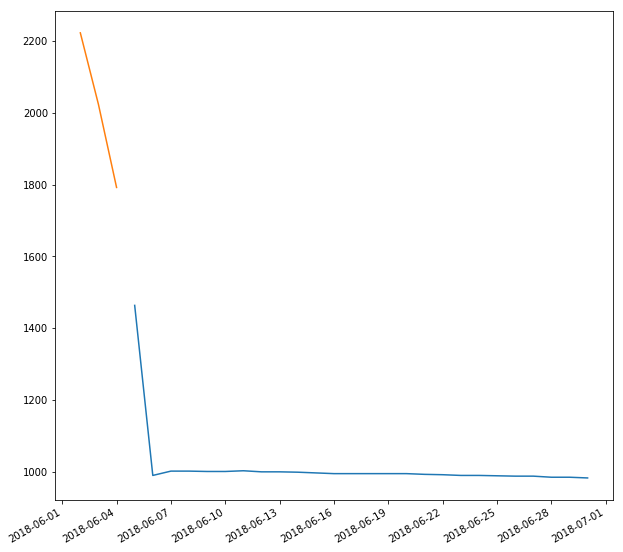

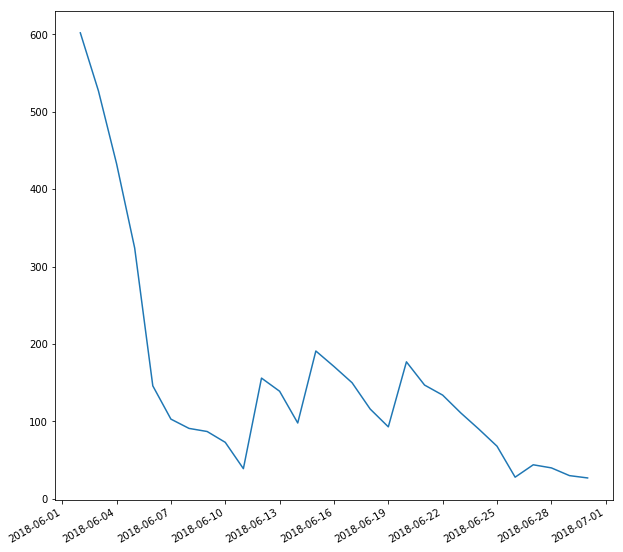

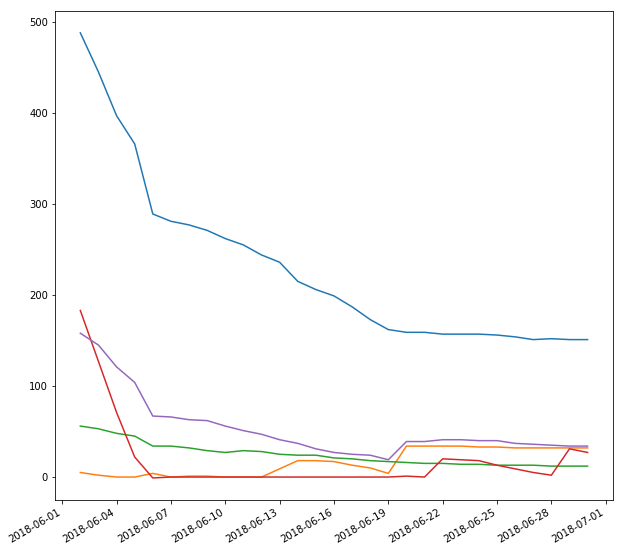

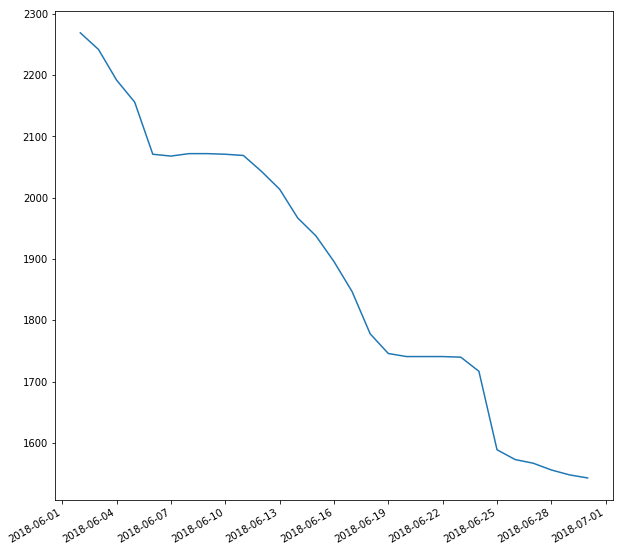

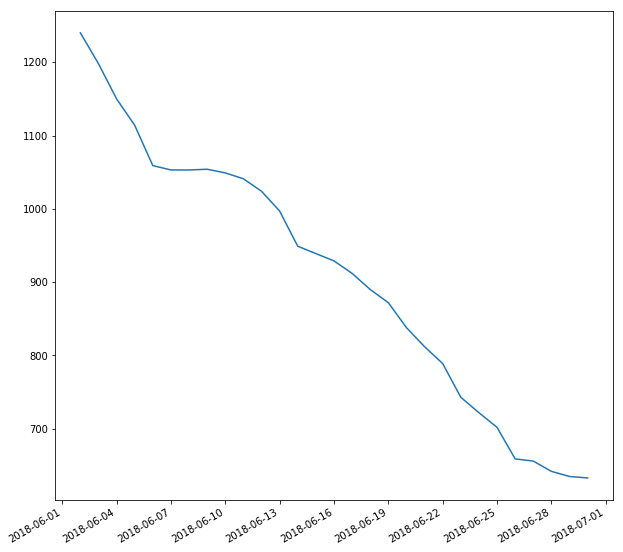

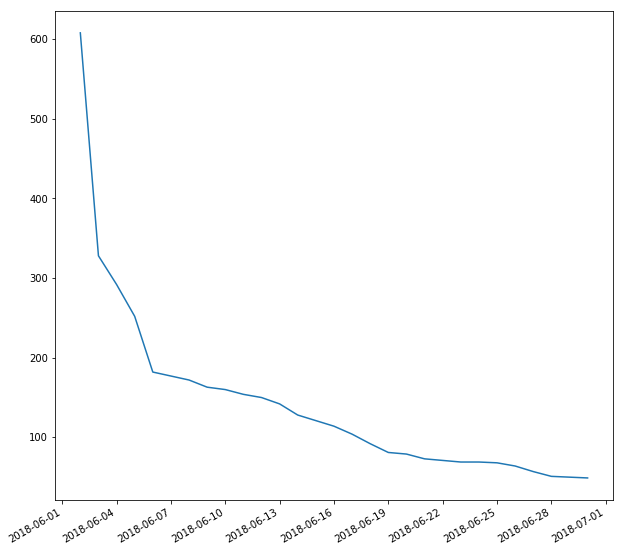

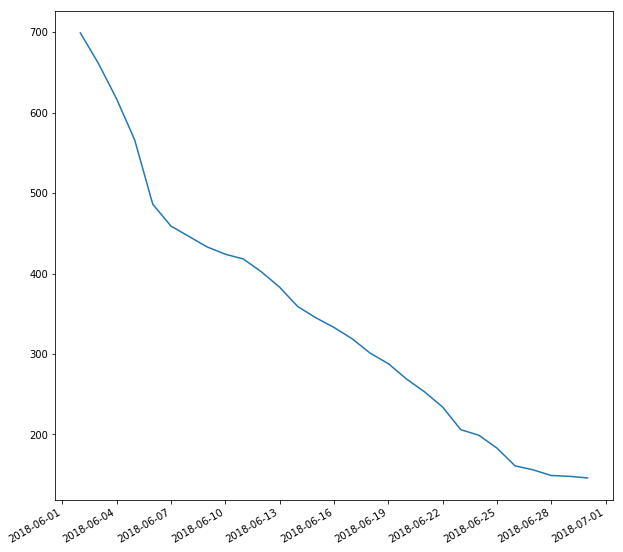

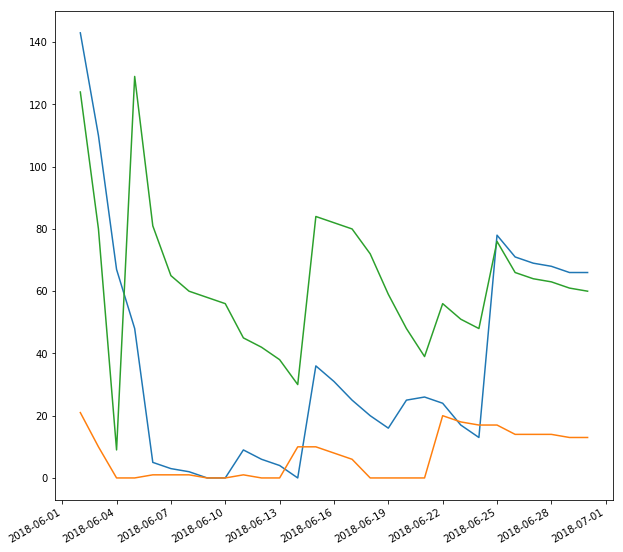

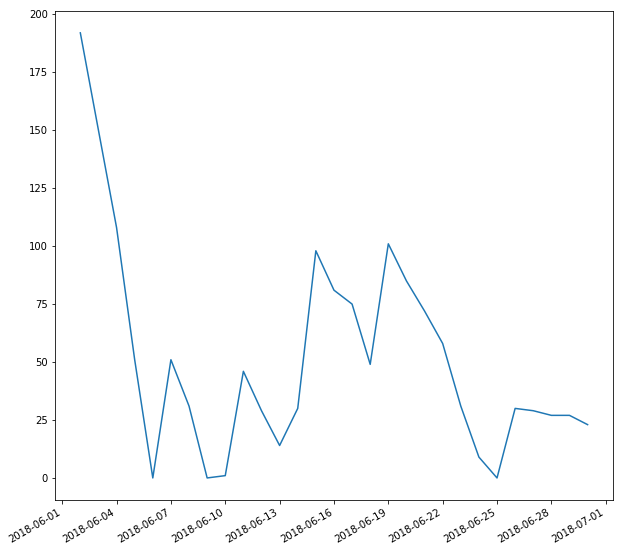

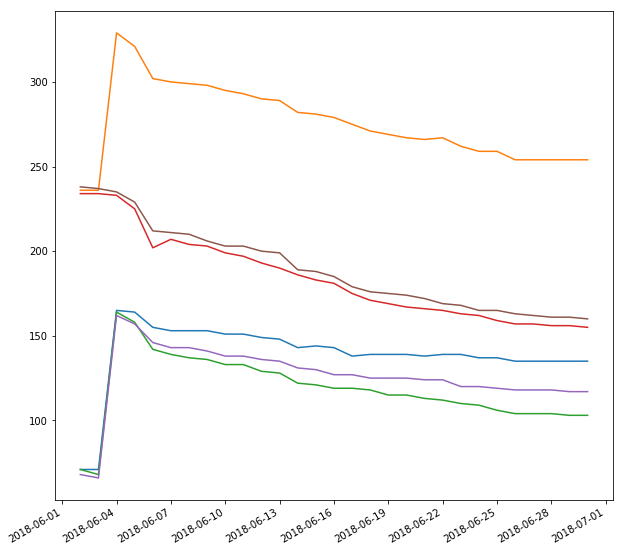

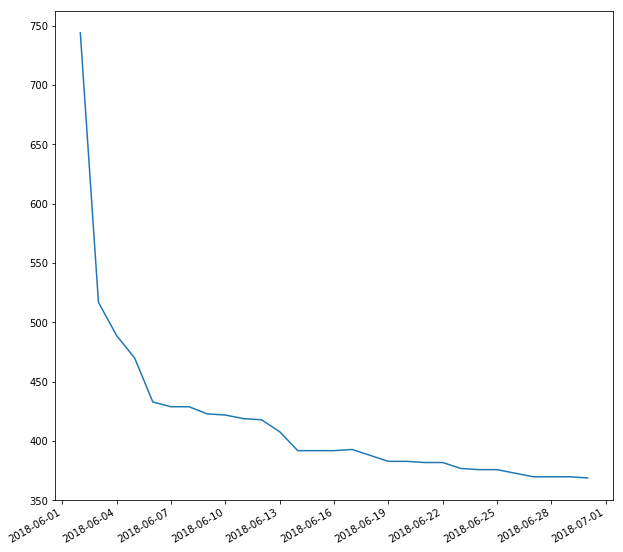

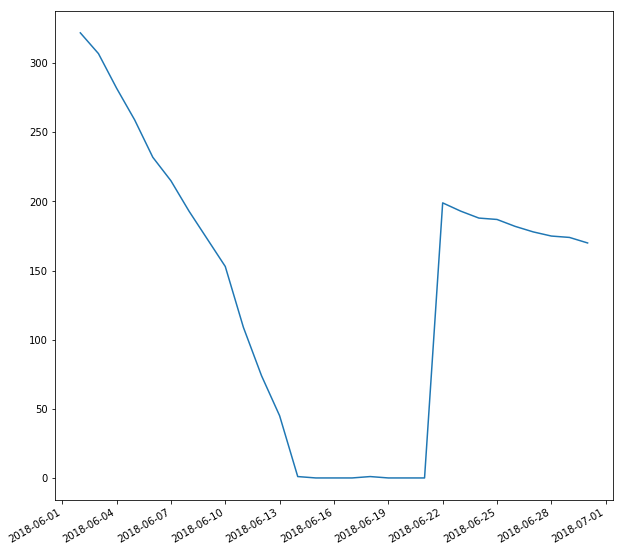

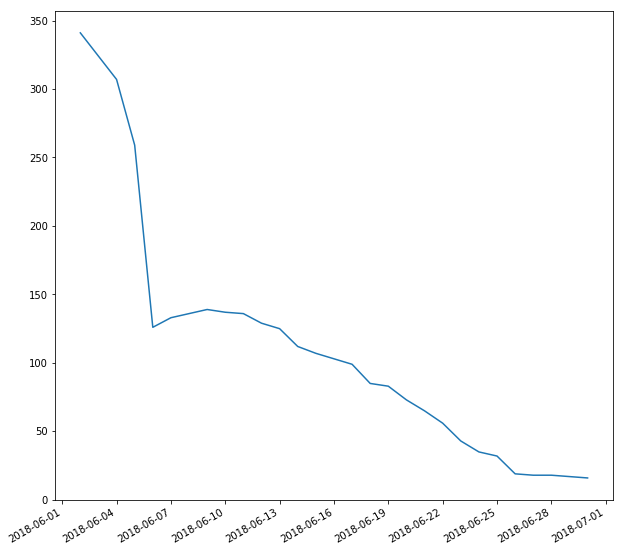

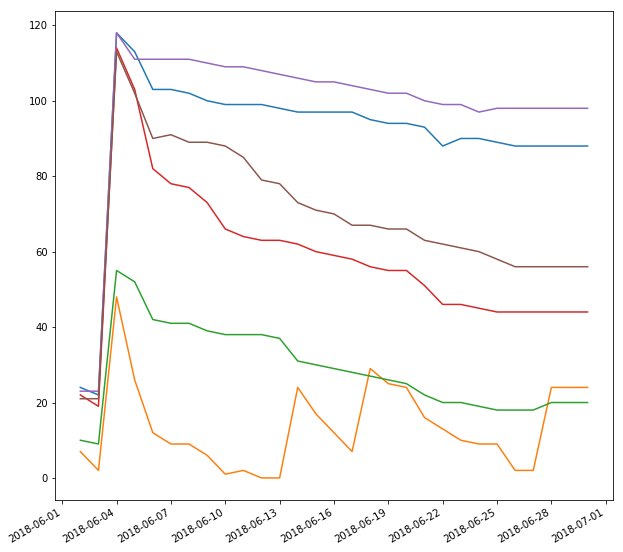

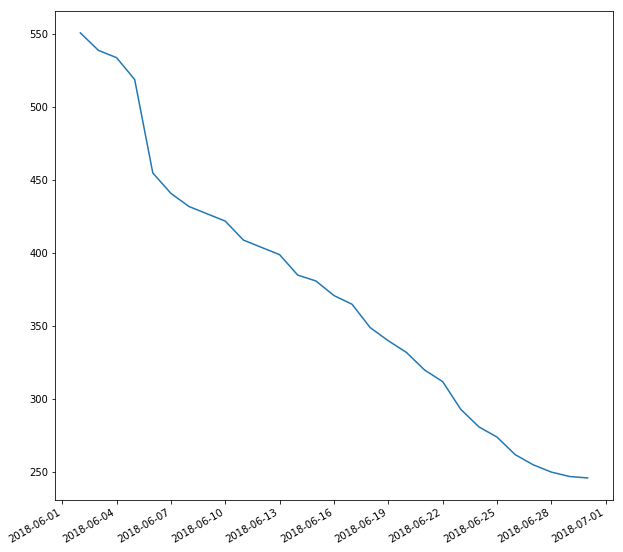

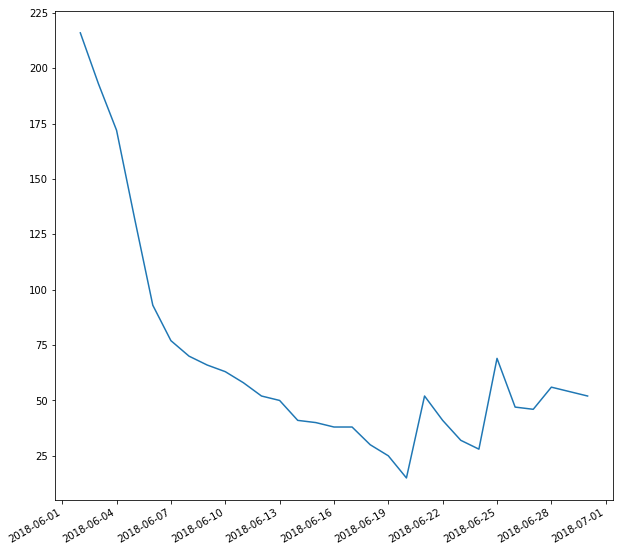

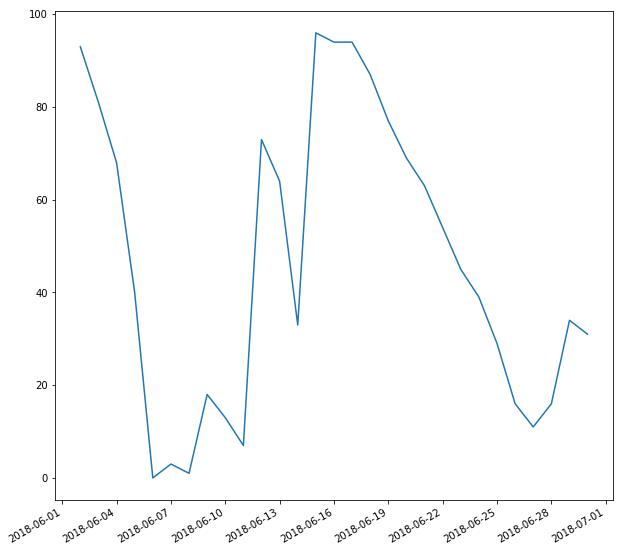

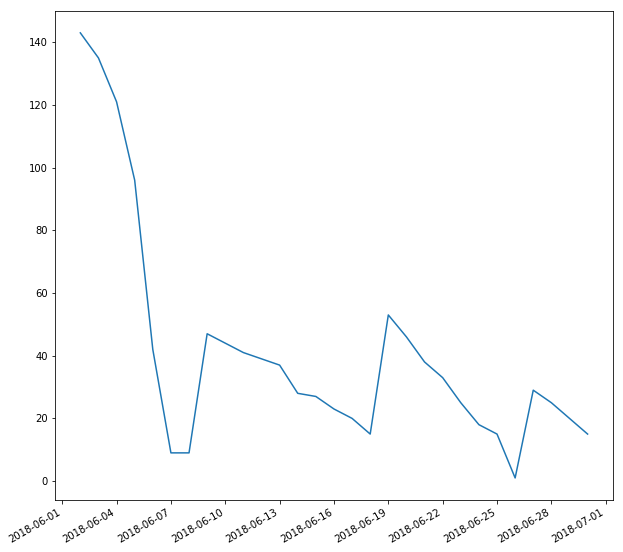

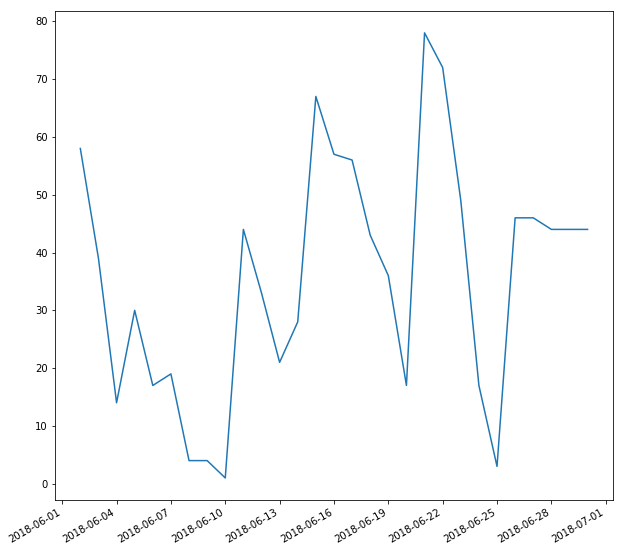

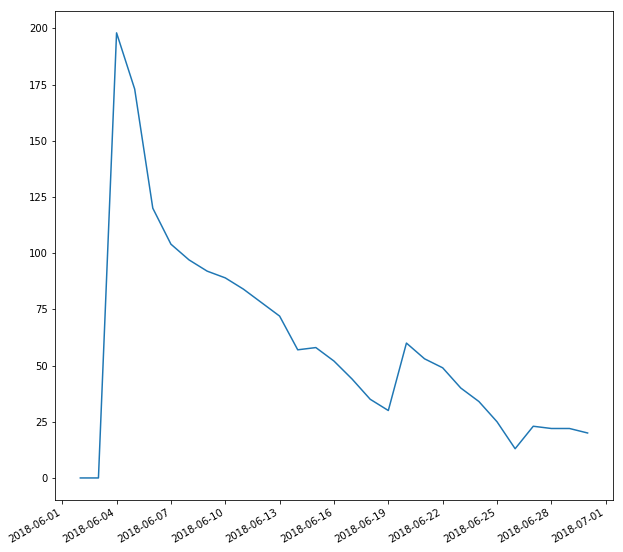

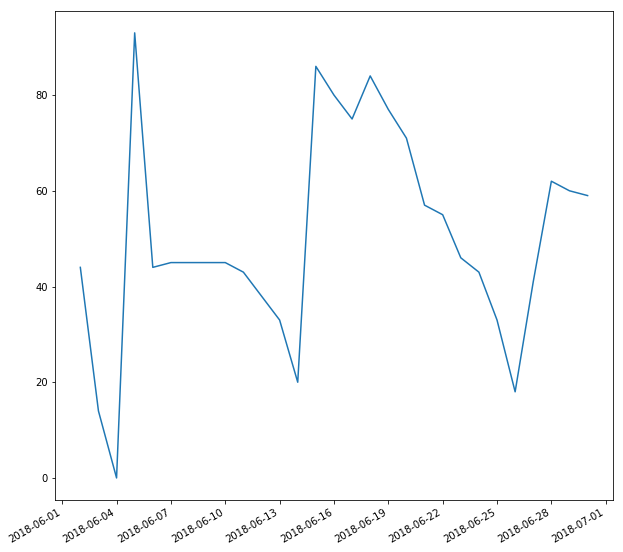

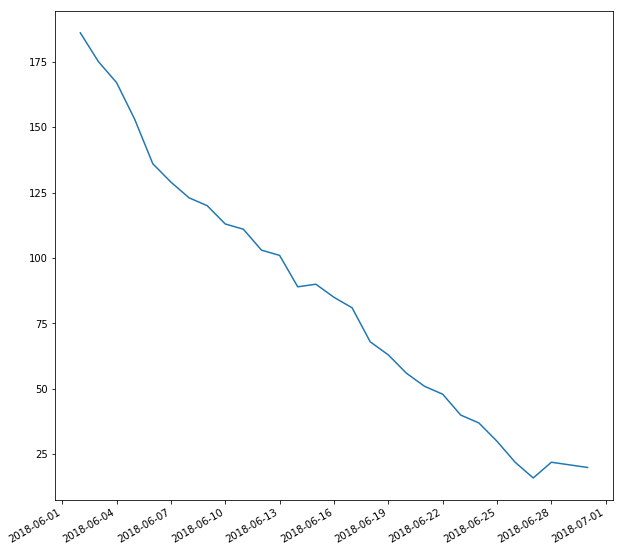

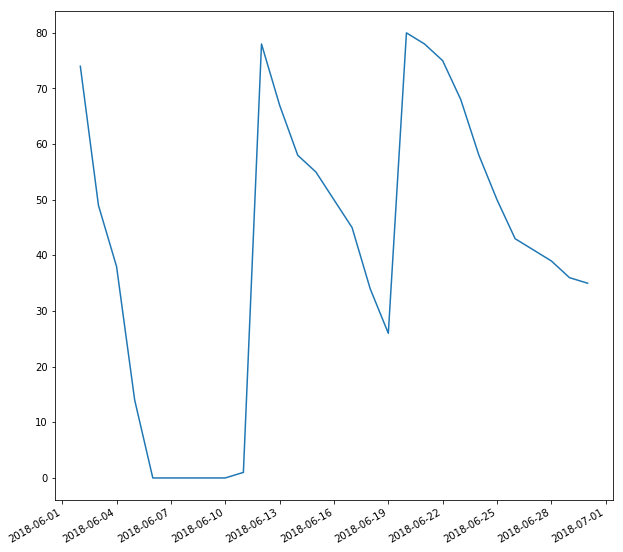

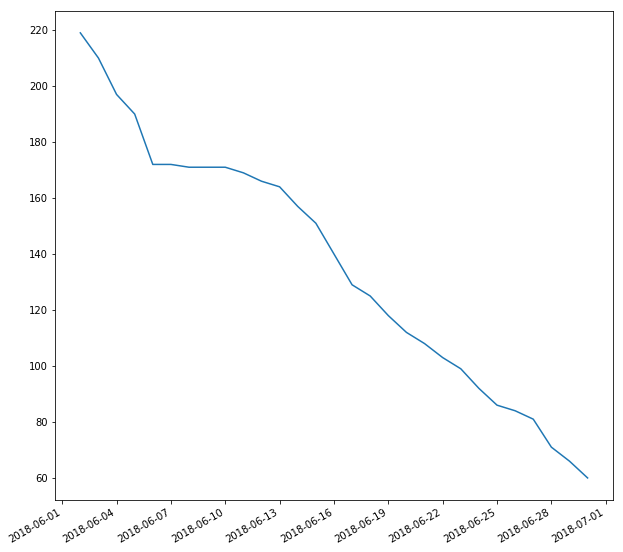

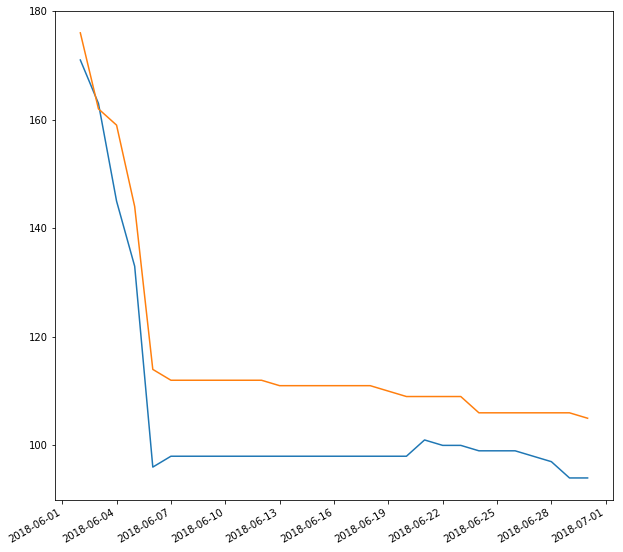

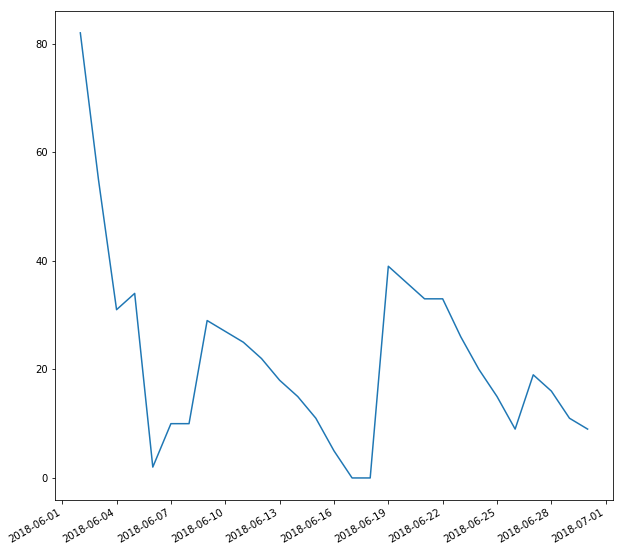

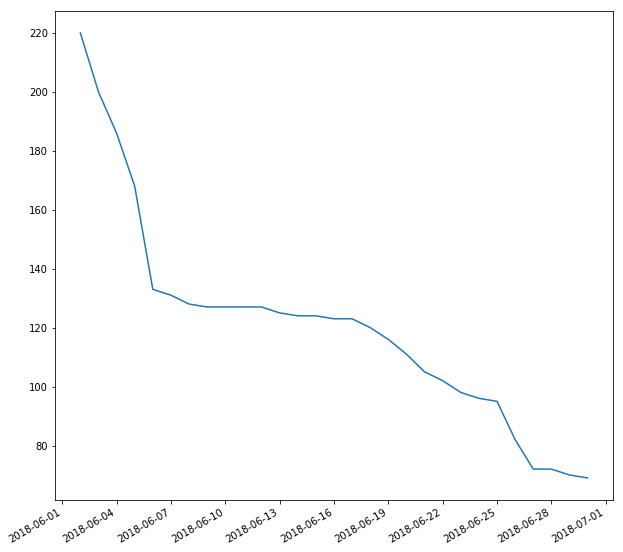

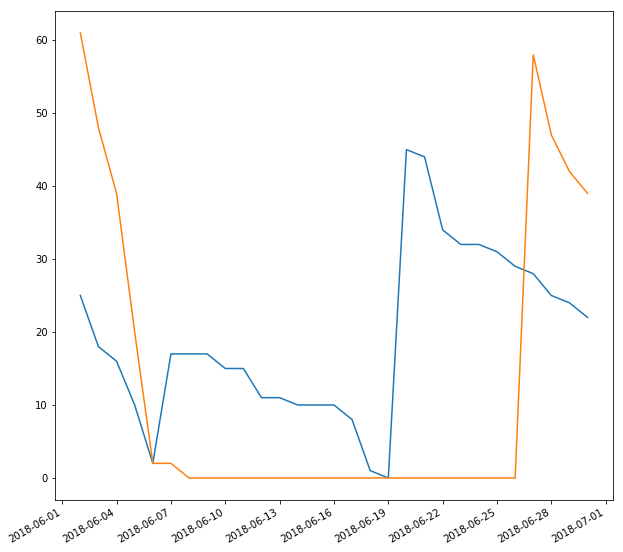

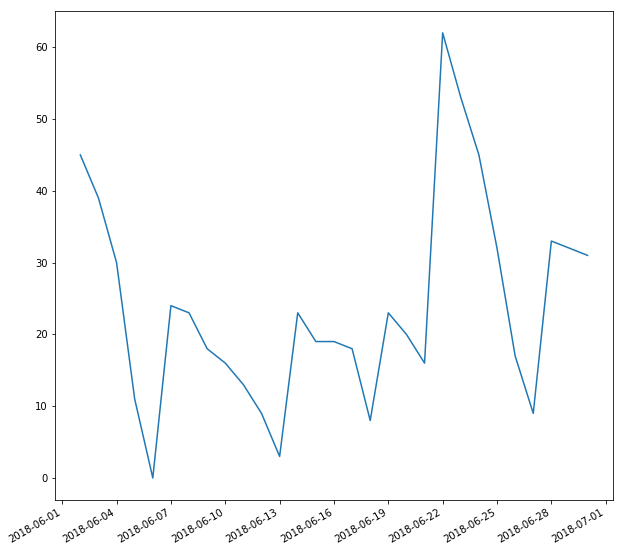

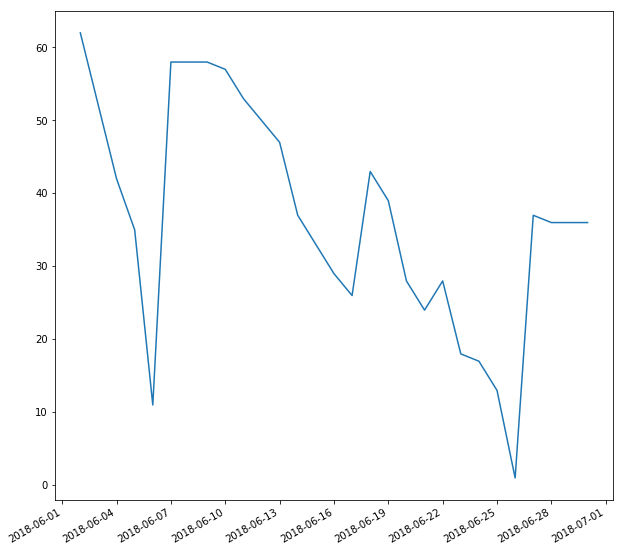

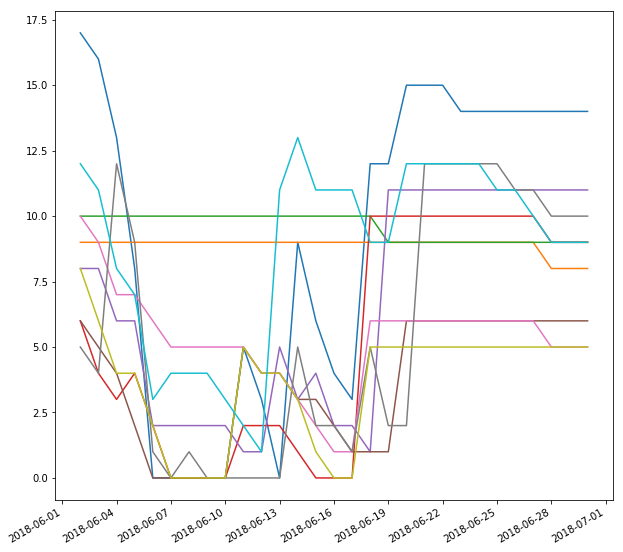

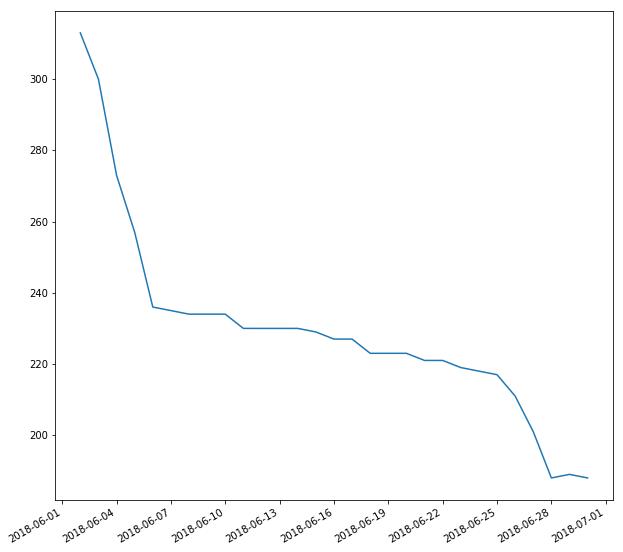

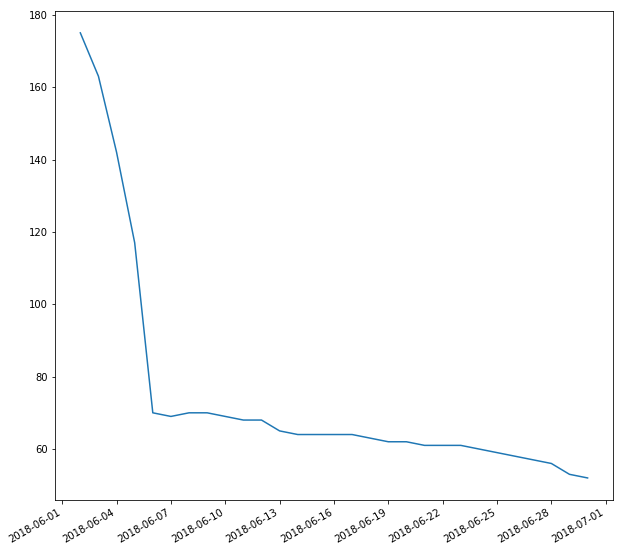

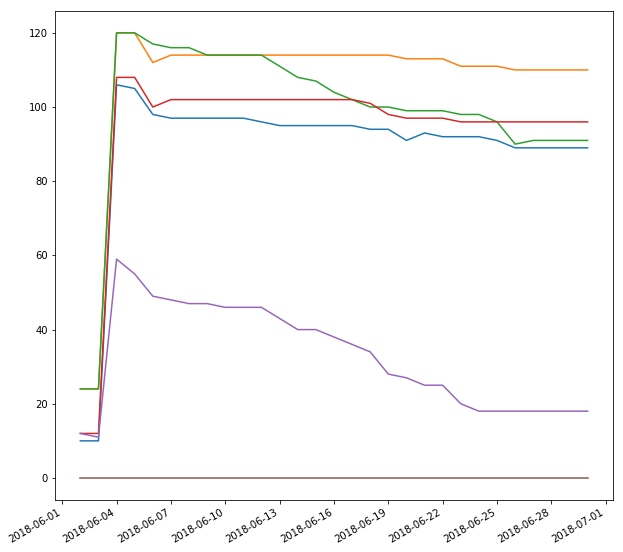

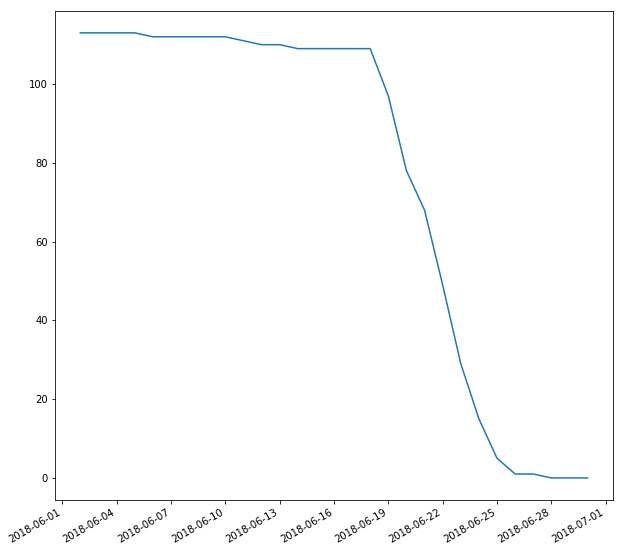

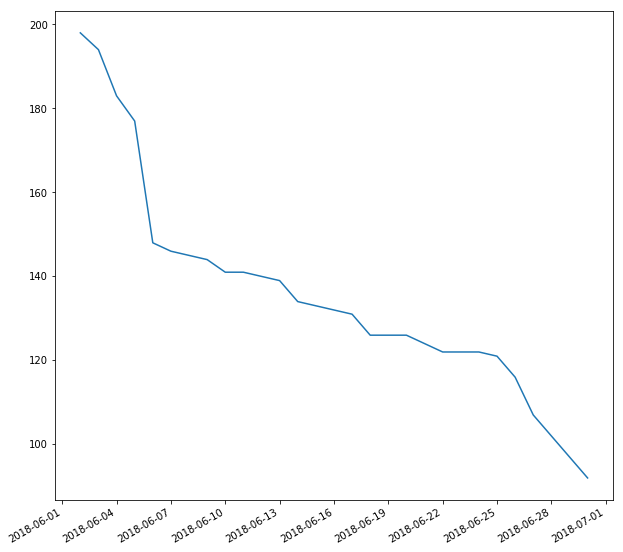

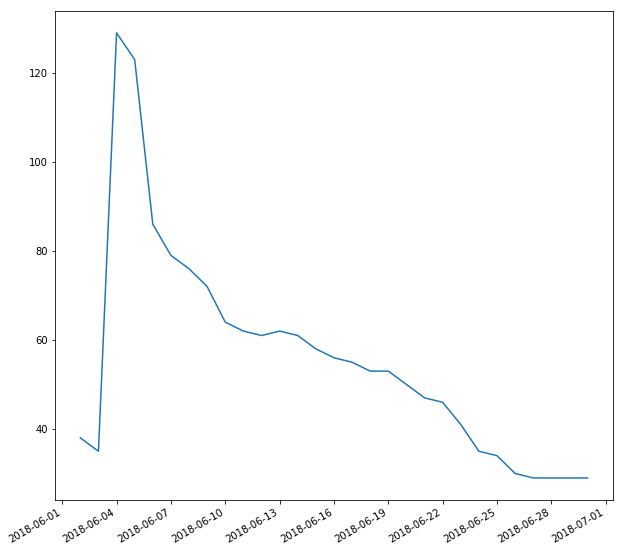

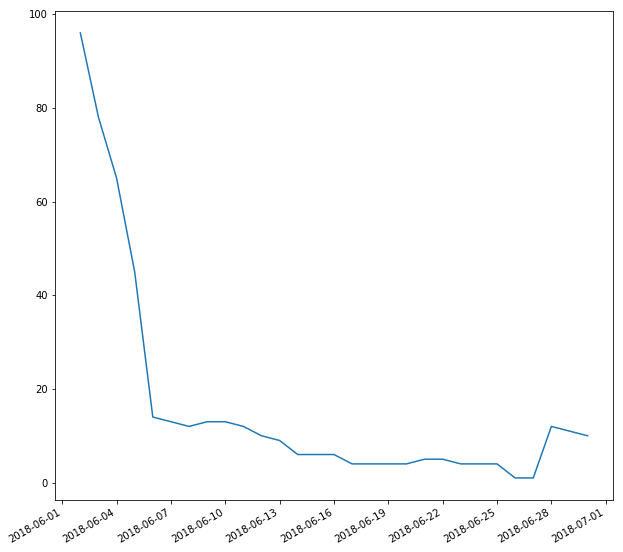

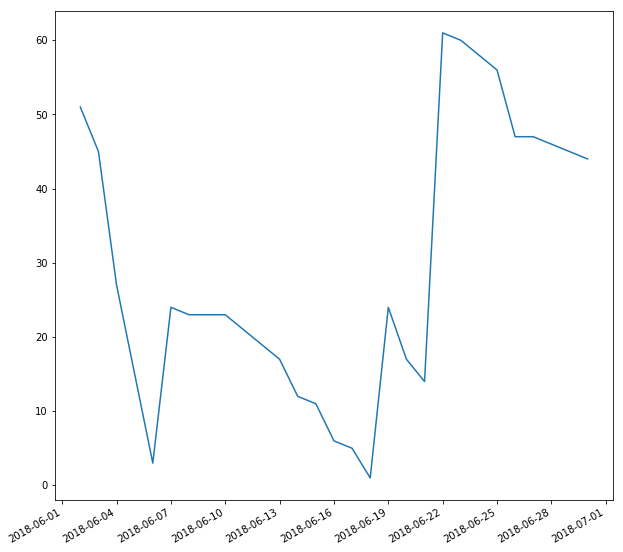

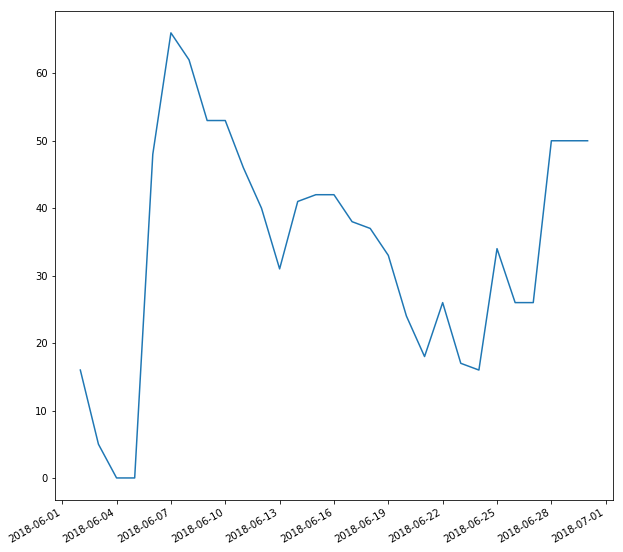

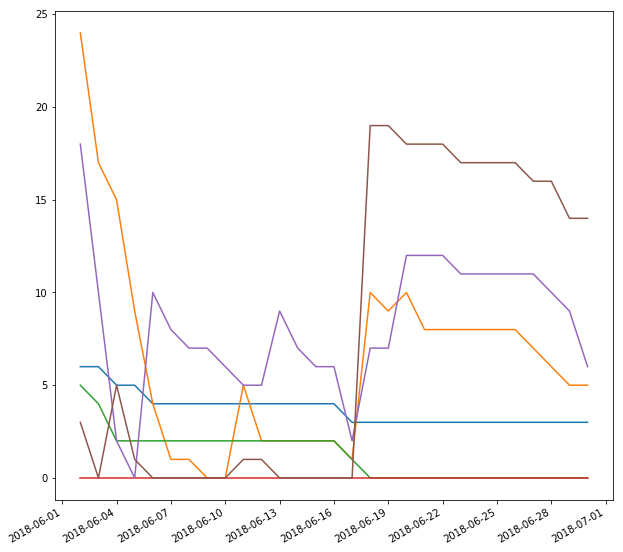

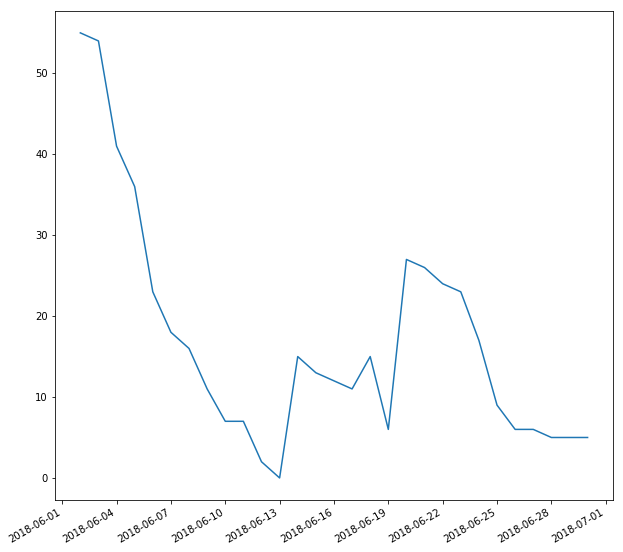

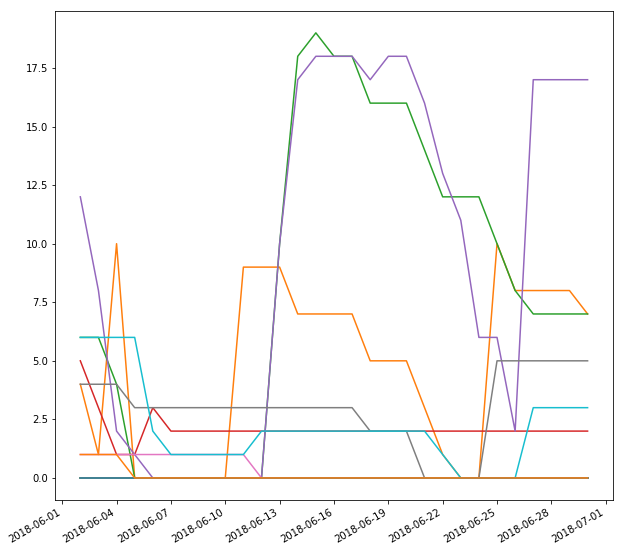

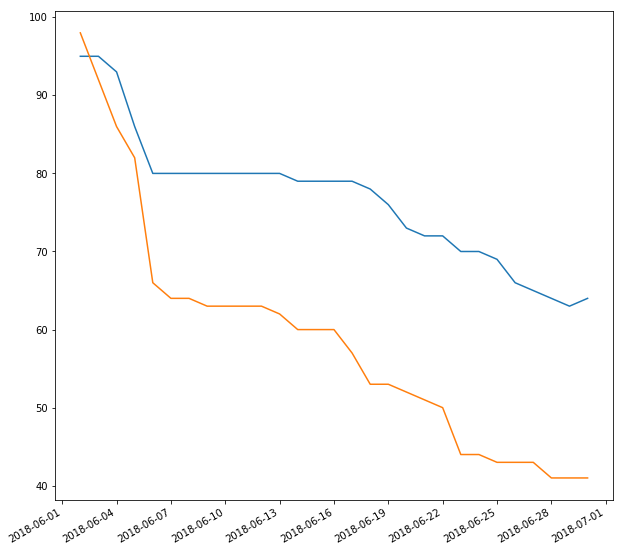

In [220]:
for index, row in target1[target1.GOODS_NAME.isin(final1[final1.MAX_FREQ==1].GOODS_NAME)].iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    plt.figure(figsize=(10,10))
    for _, group in temp.groupby('STOCK_ID'):
        group = group[-group.STOCK_AMOUNT.isnull()]
        plt.plot(pd.to_datetime(group.COLLECT_DAY), group.STOCK_AMOUNT)
    plt.gcf().autofmt_xdate()
    plt.savefig('PLOTS0802/TOTAL/GSSHOP:%s_%s.png'%(row.ITEM_ID, row.GOODS_NAME.replace("/", "_")))
for index, row in target2[target2.GOODS_NAME.isin(final2[final2.MAX_FREQ==1].GOODS_NAME)].iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    plt.figure(figsize=(10,10))
    for _, group in temp.groupby('STOCK_ID'):
        group = group[-group.STOCK_AMOUNT.isnull()]
        plt.plot(pd.to_datetime(group.COLLECT_DAY), group.STOCK_AMOUNT)
    plt.gcf().autofmt_xdate()
    plt.savefig('PLOTS0802/TOTAL/HMALL:%s_%s.png'%(row.ITEM_ID, row.GOODS_NAME.replace("/", "_")))
for index, row in target3[target3.GOODS_NAME.isin(final3[final3.MAX_FREQ==1].GOODS_NAME)].iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    plt.figure(figsize=(10,10))
    for _, group in temp.groupby('STOCK_ID'):
        group = group[-group.STOCK_AMOUNT.isnull()]
        plt.plot(pd.to_datetime(group.COLLECT_DAY), group.STOCK_AMOUNT)
    plt.gcf().autofmt_xdate()
    plt.savefig('PLOTS0802/TOTAL/OLIVEYOUNG:%s_%s.png'%(row.ITEM_ID, row.GOODS_NAME.replace("/", "_")))

/home/aron/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


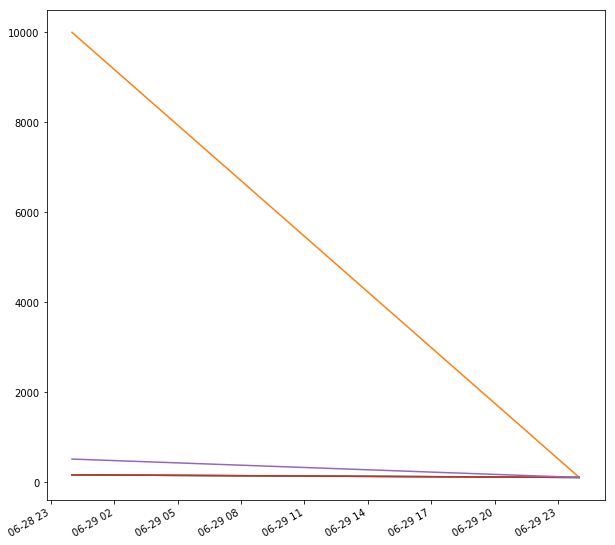

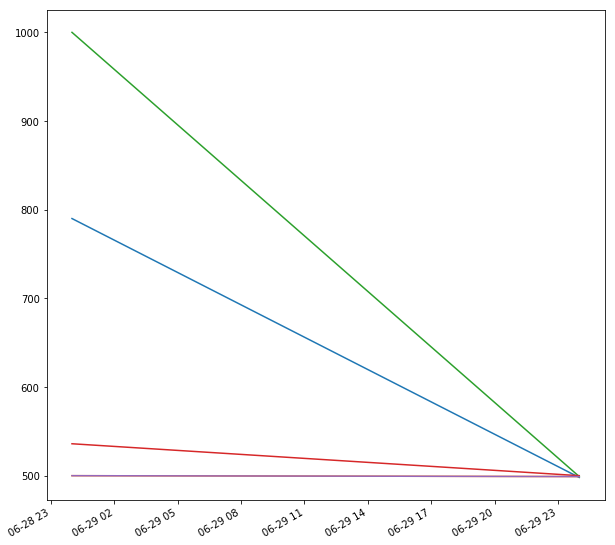

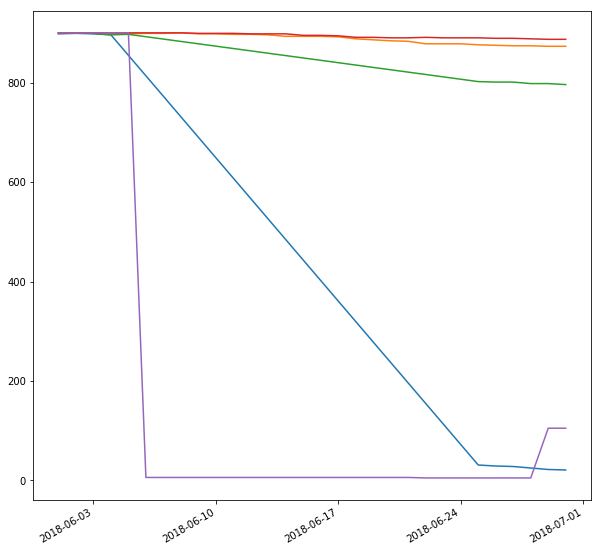

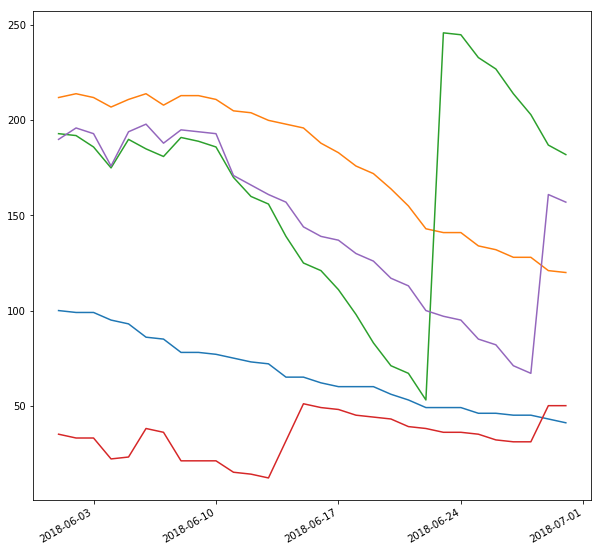

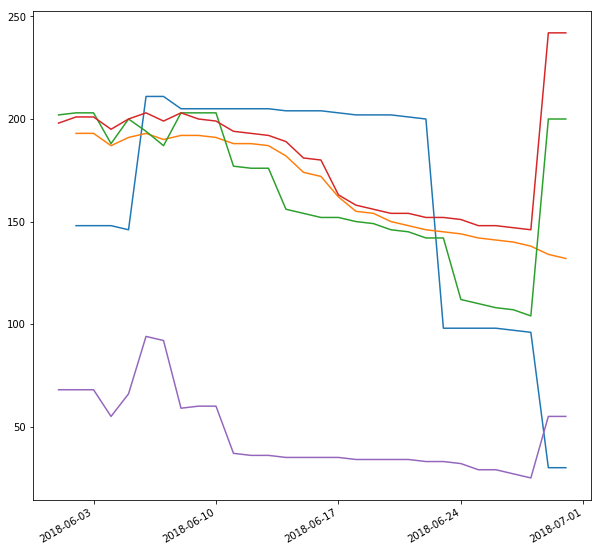

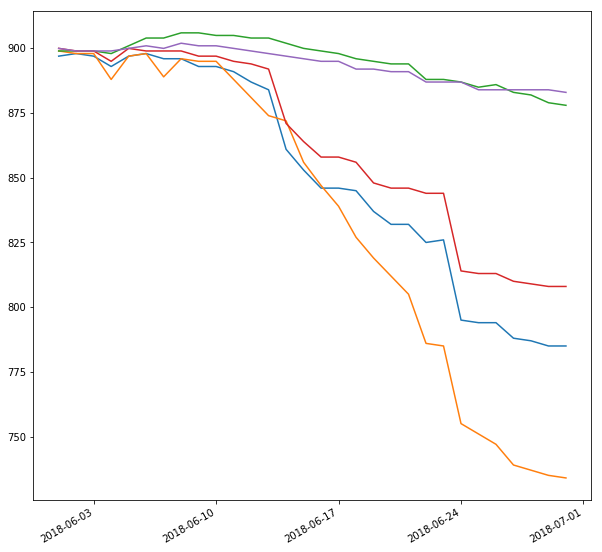

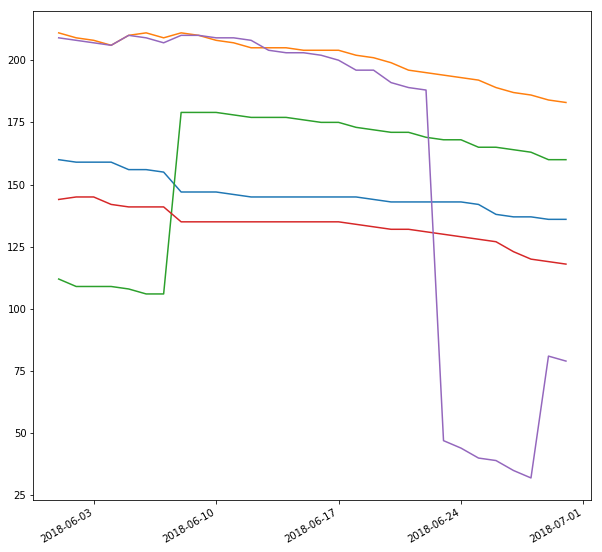

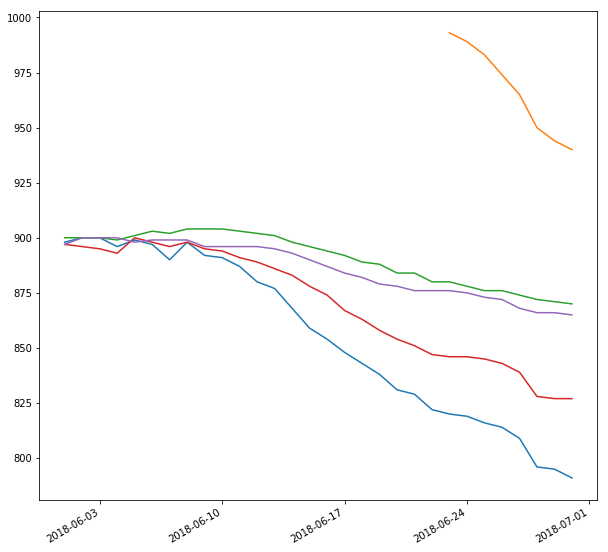

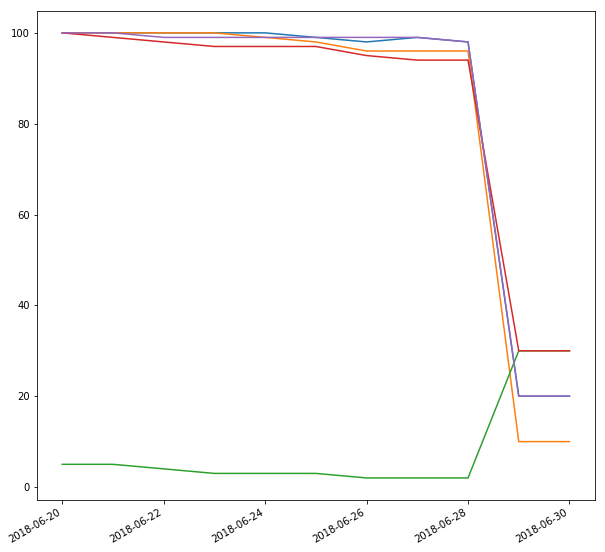

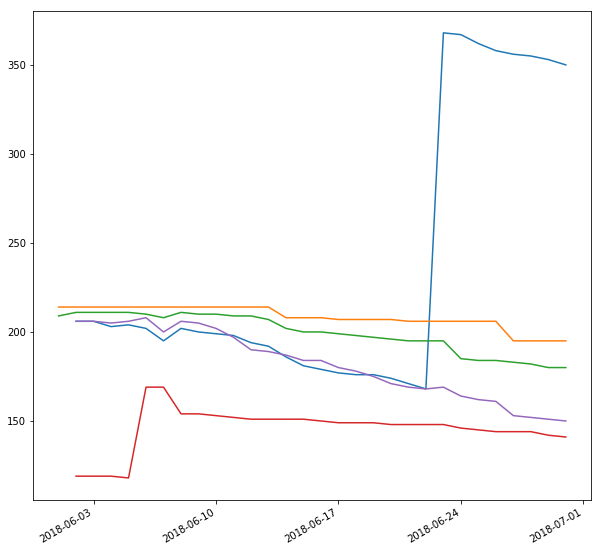

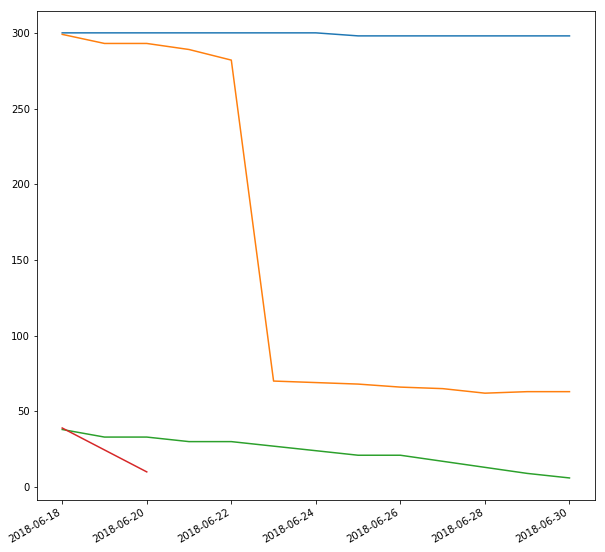

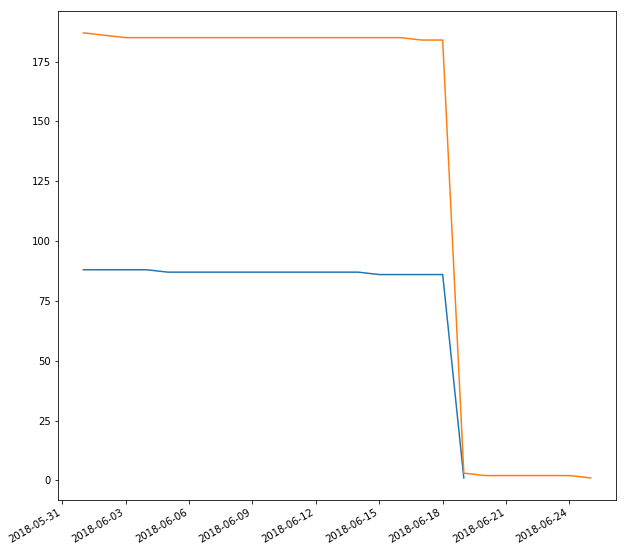

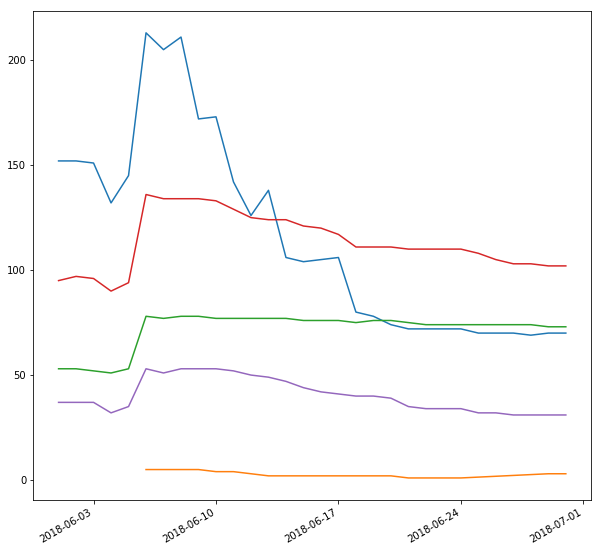

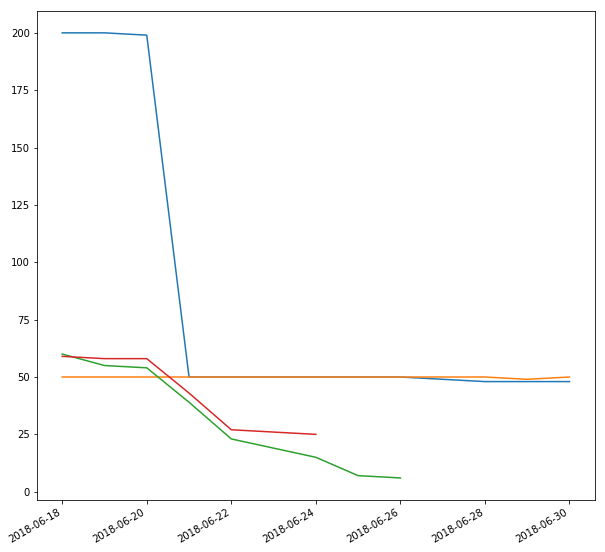

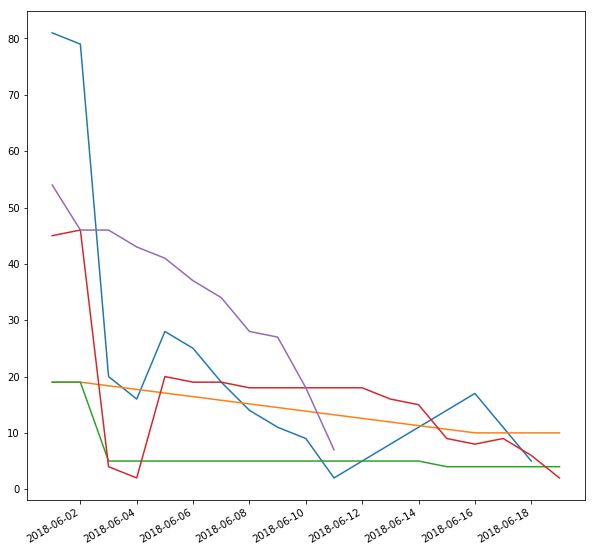

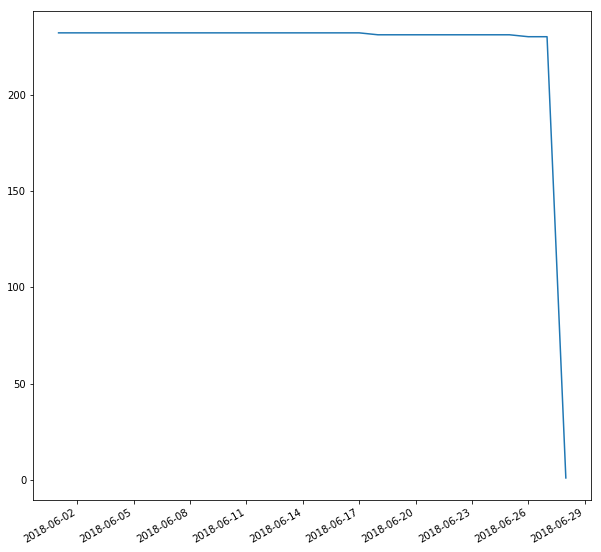

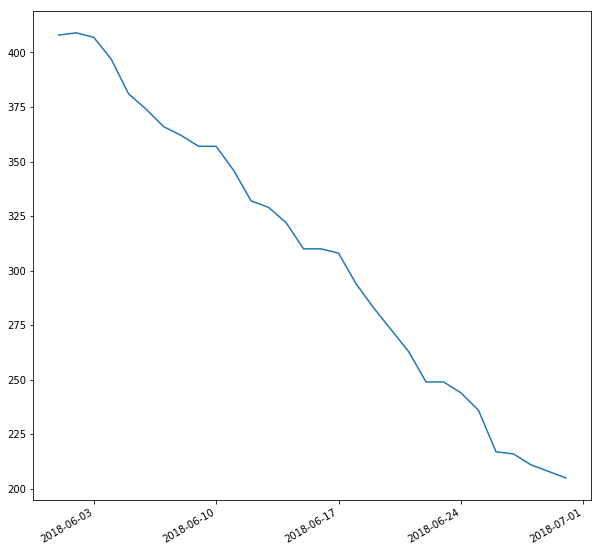

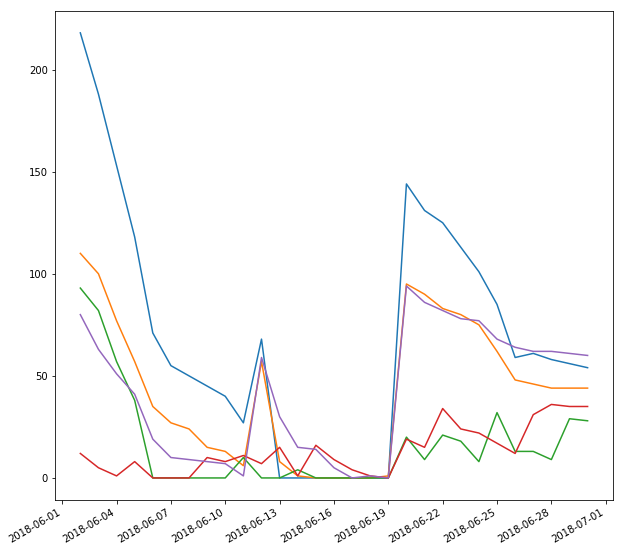

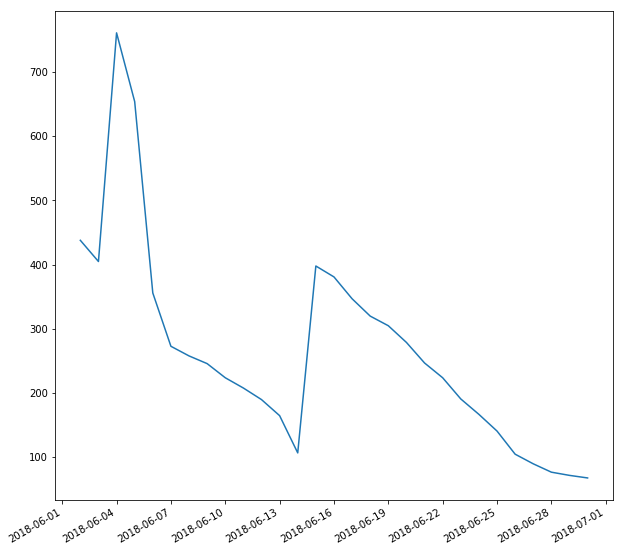

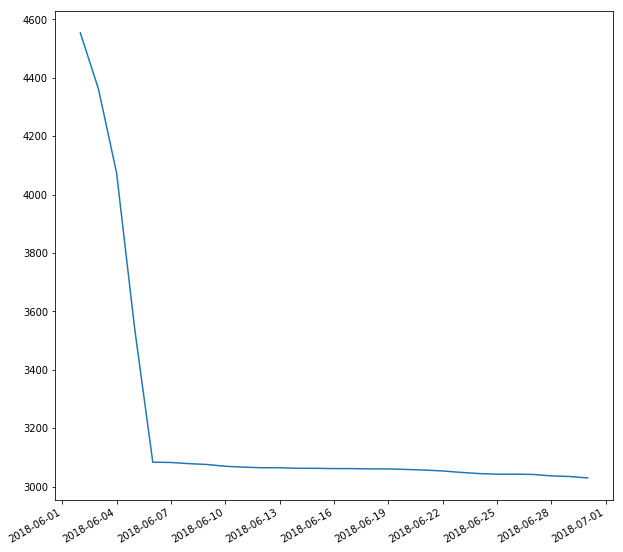

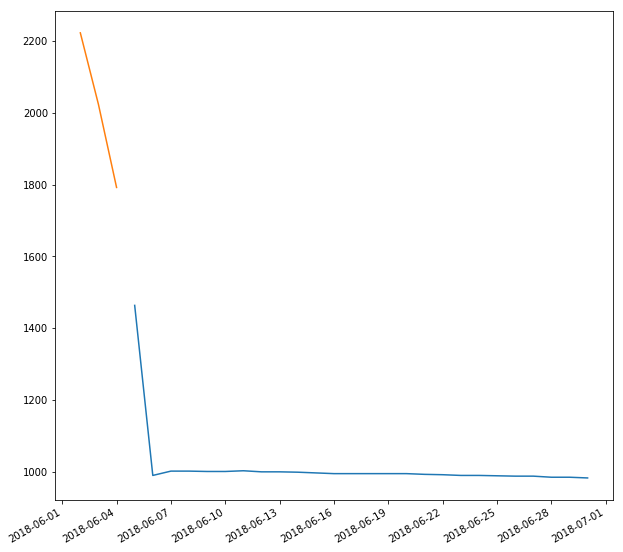

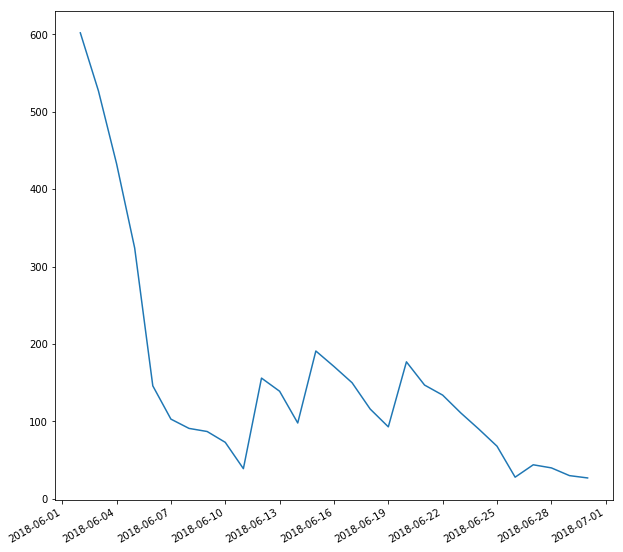

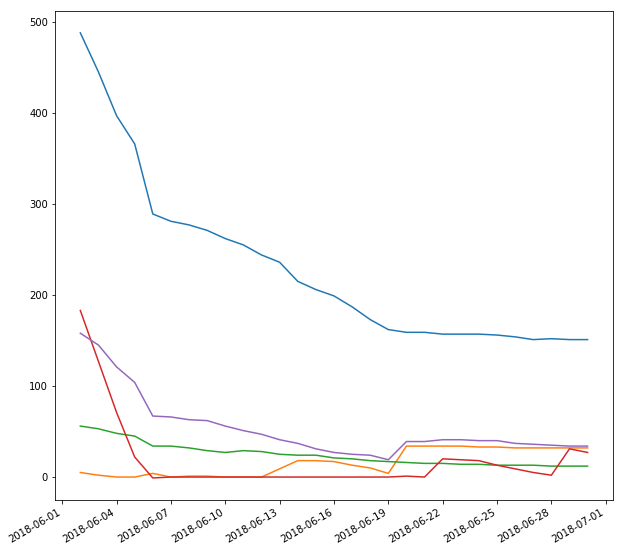

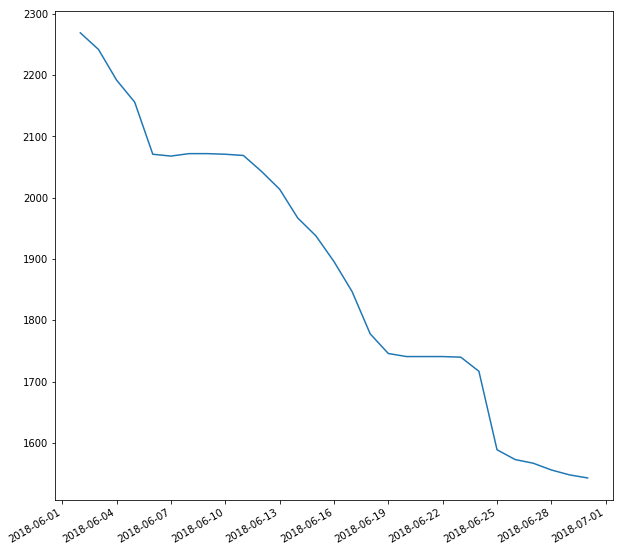

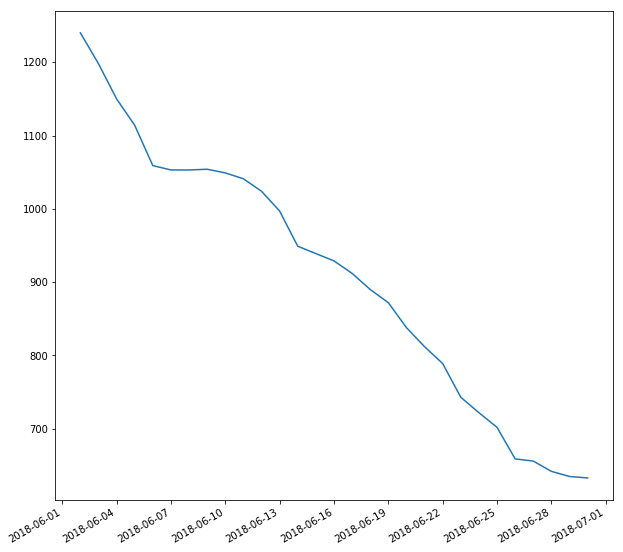

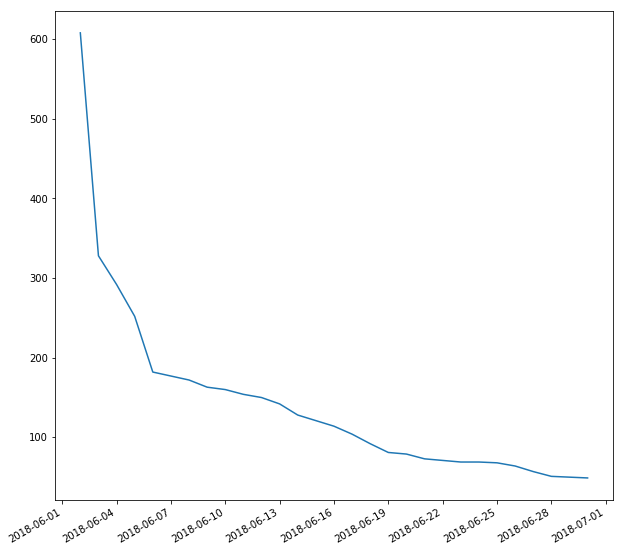

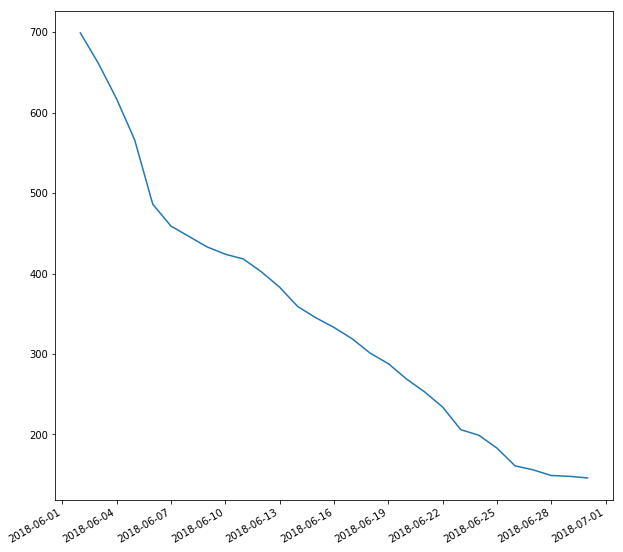

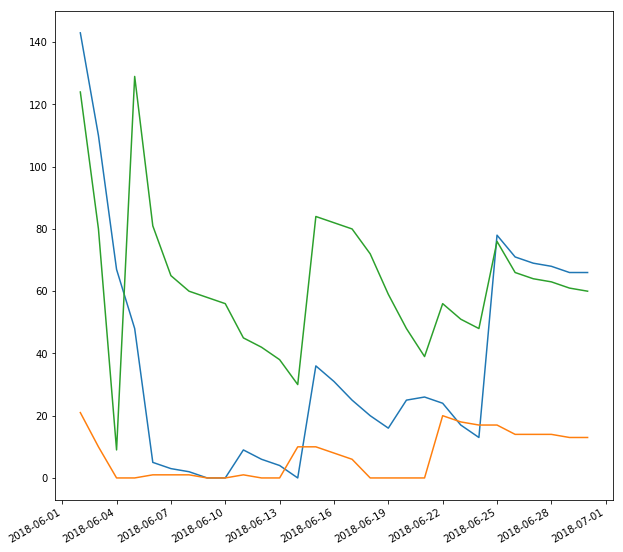

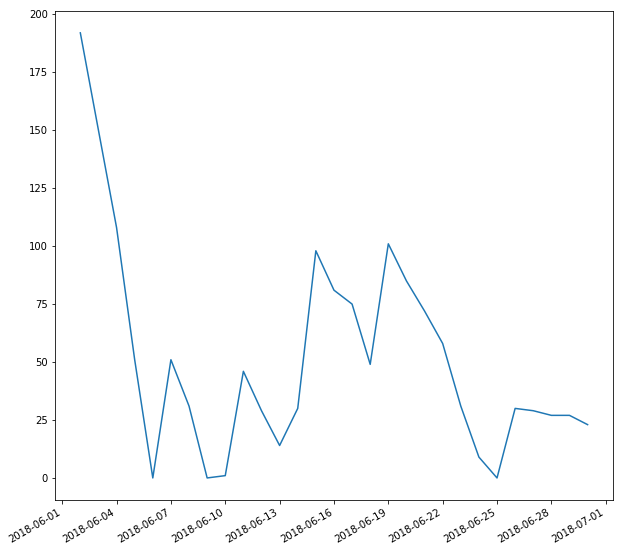

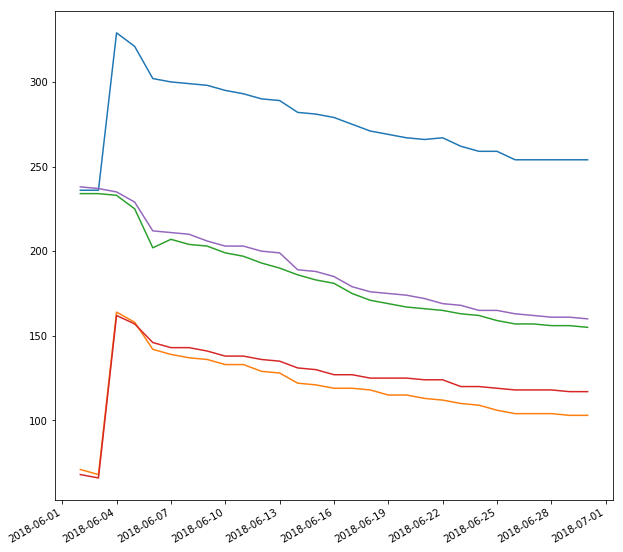

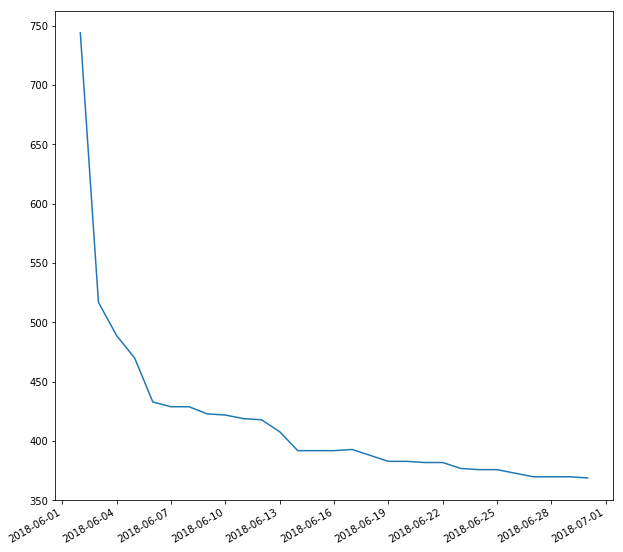

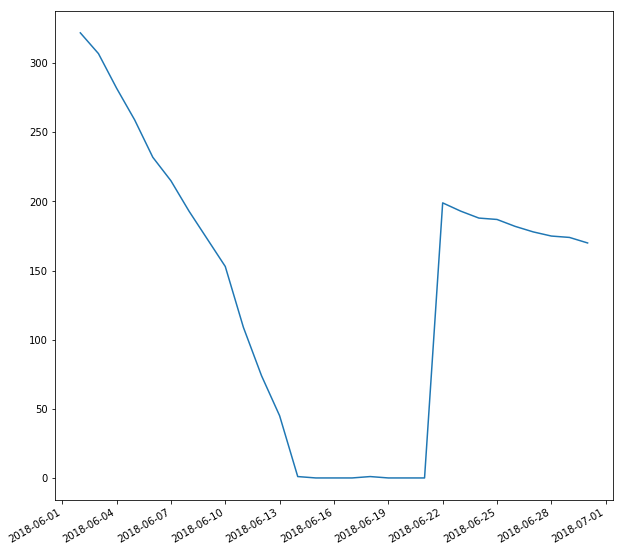

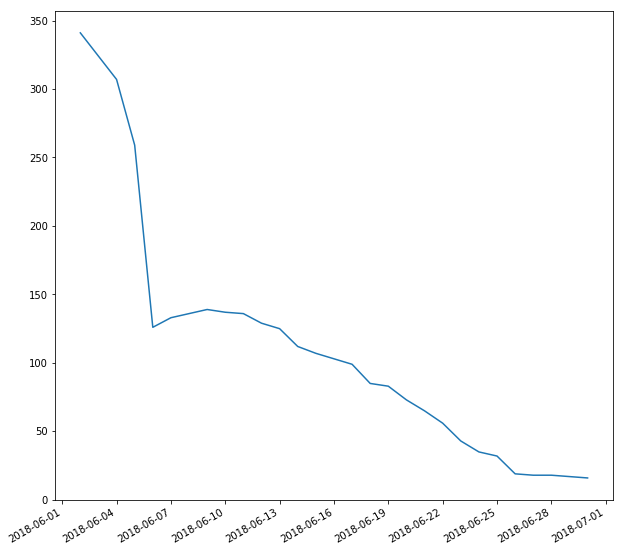

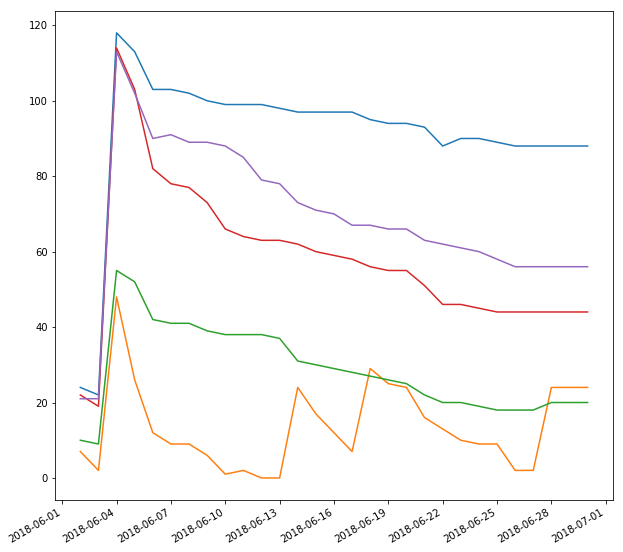

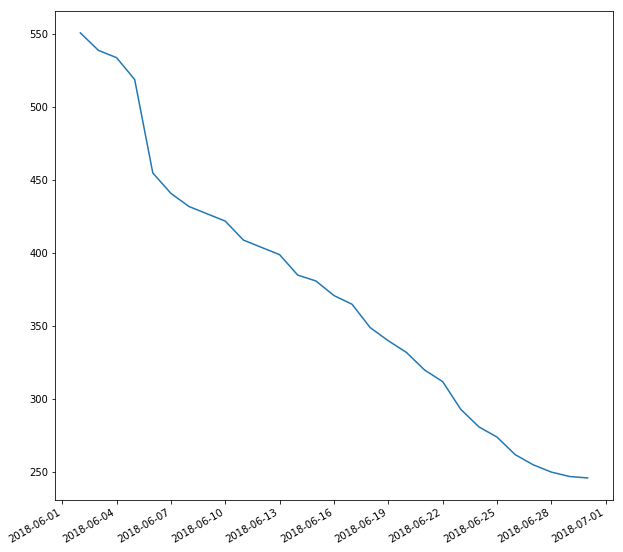

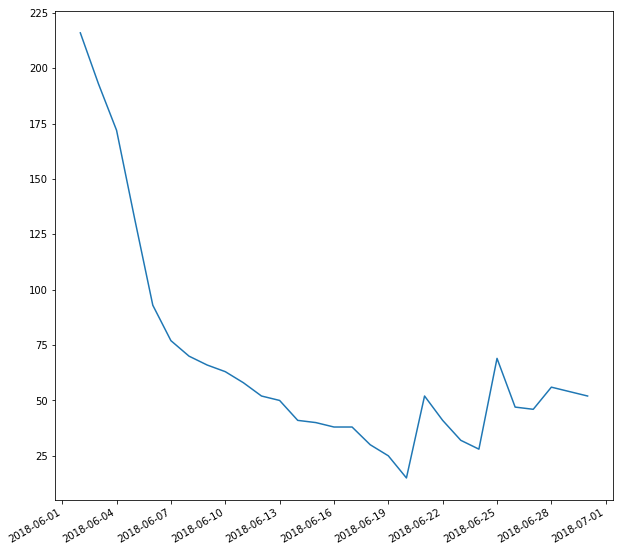

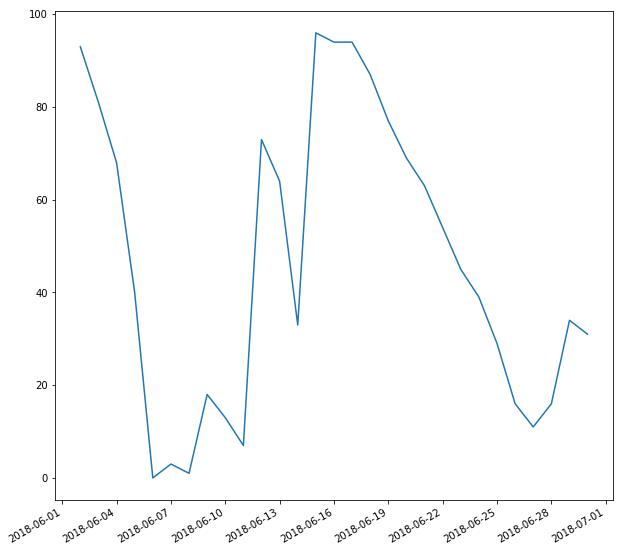

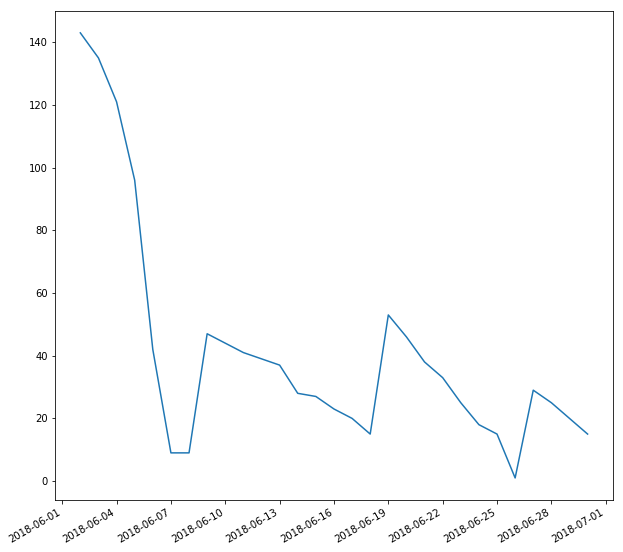

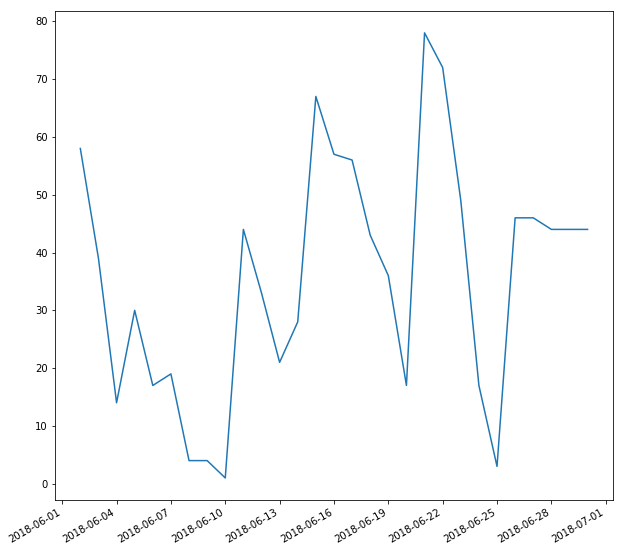

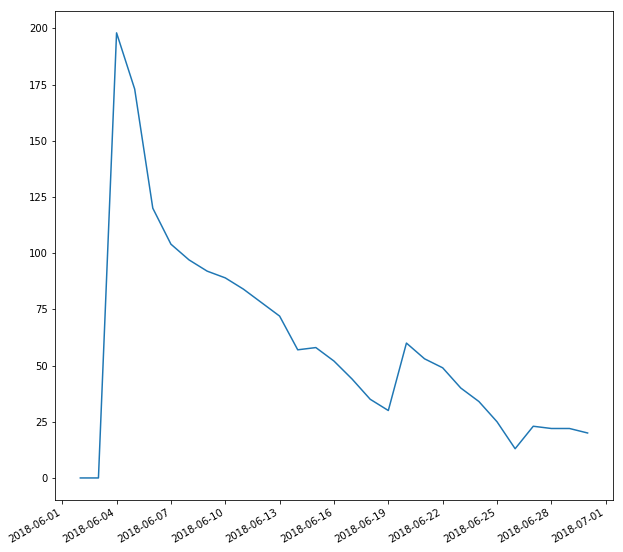

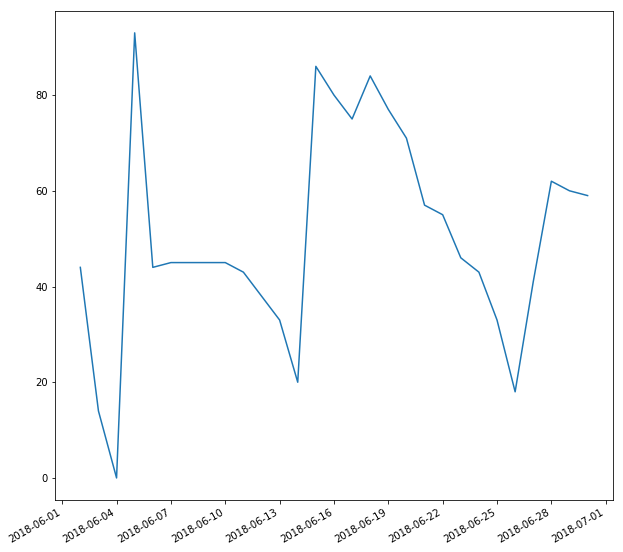

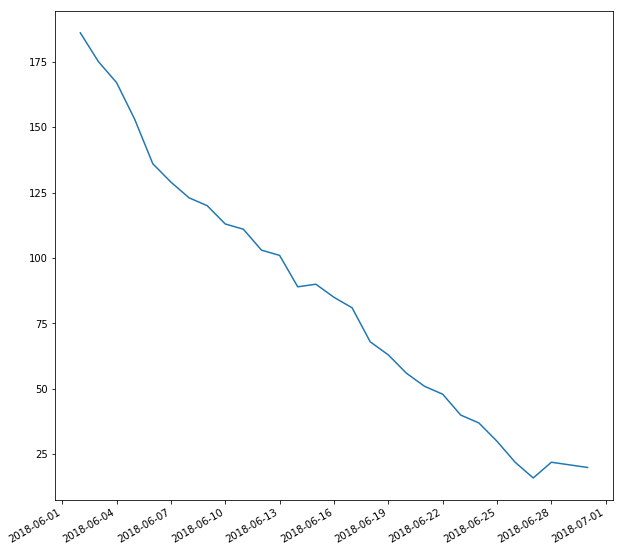

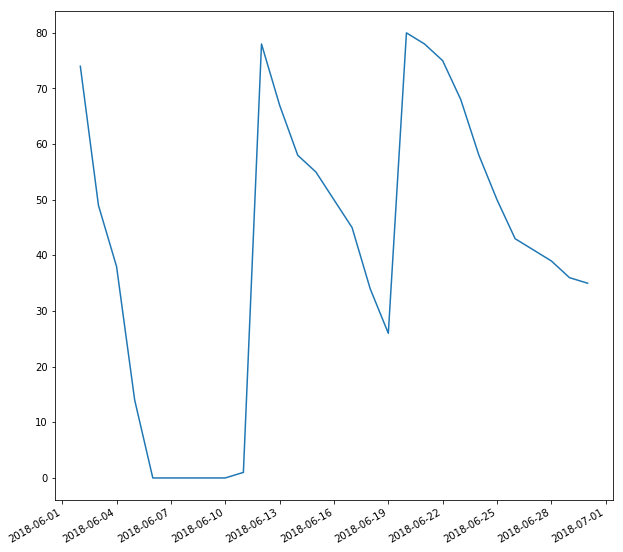

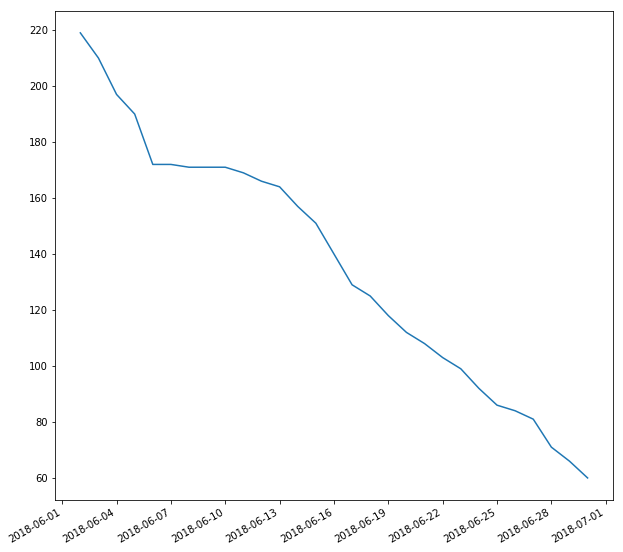

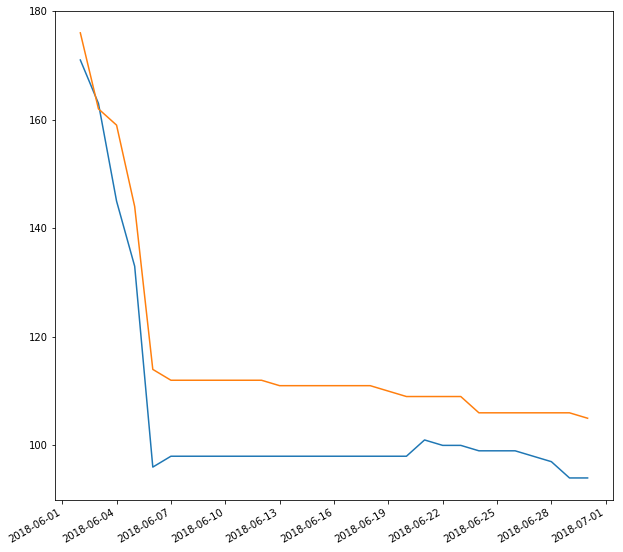

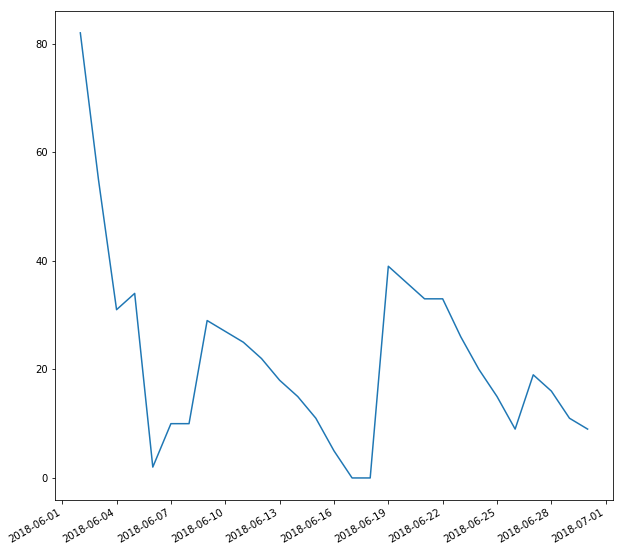

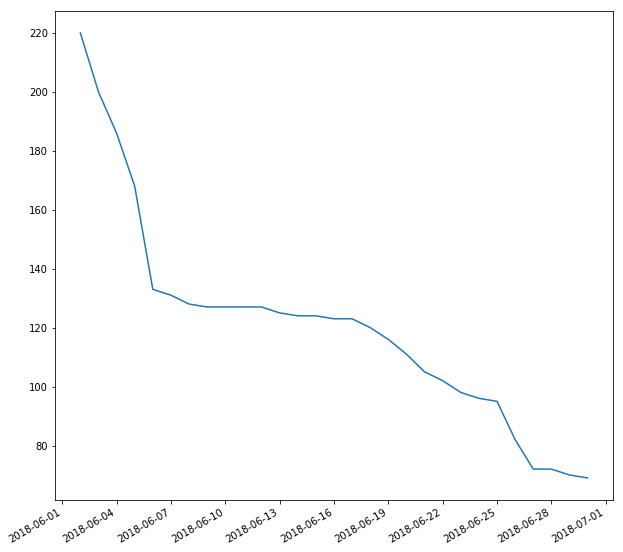

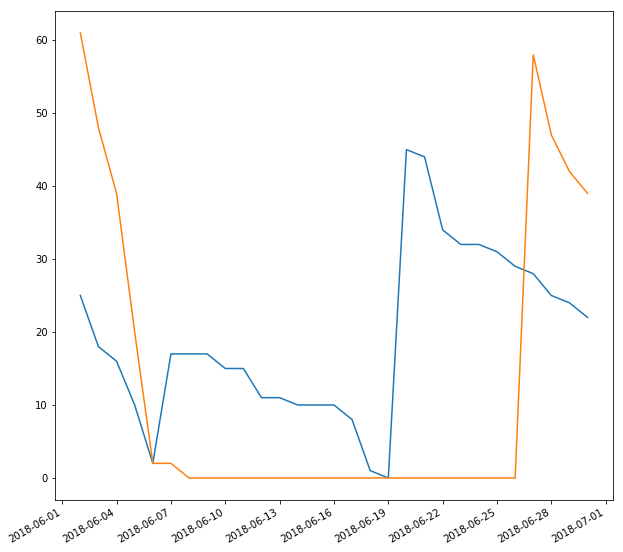

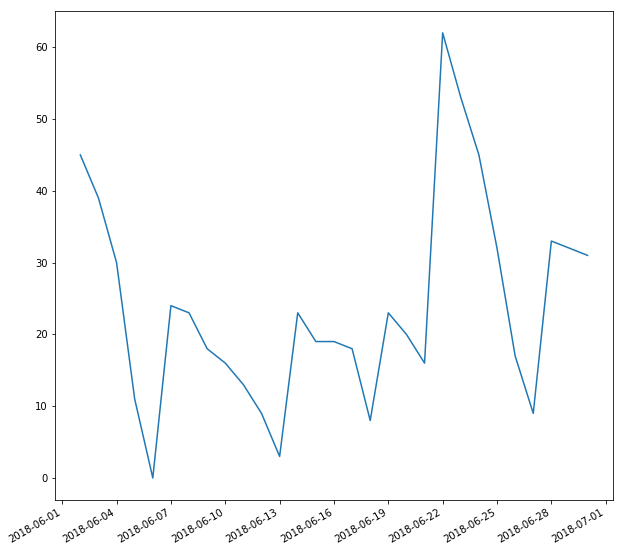

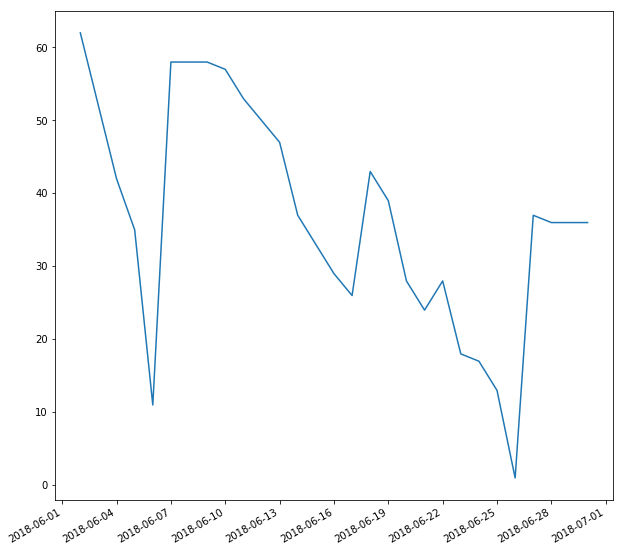

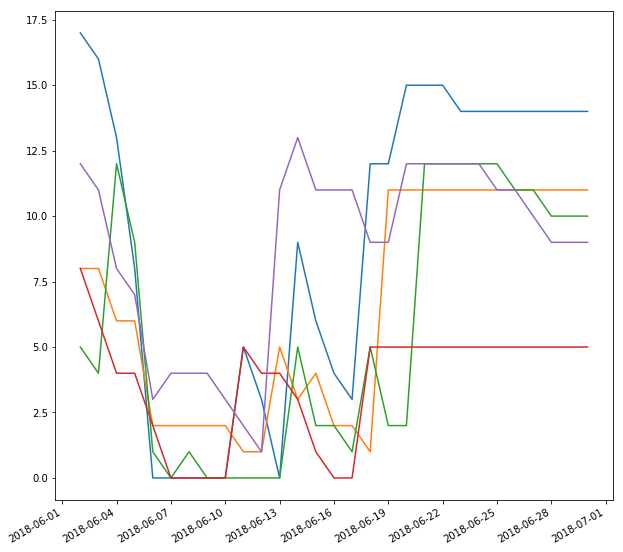

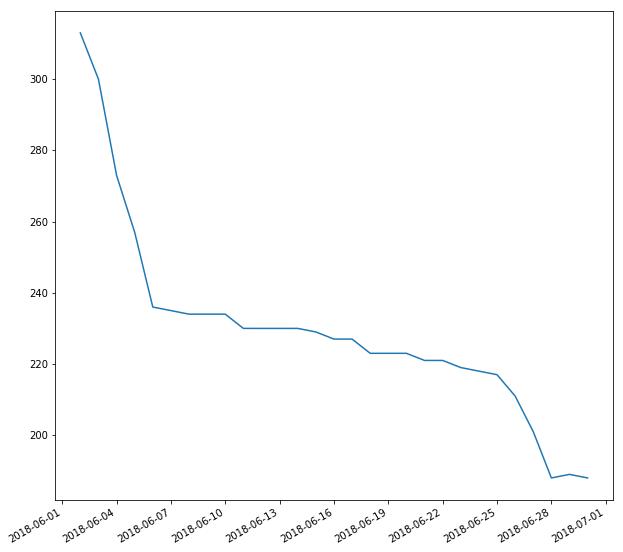

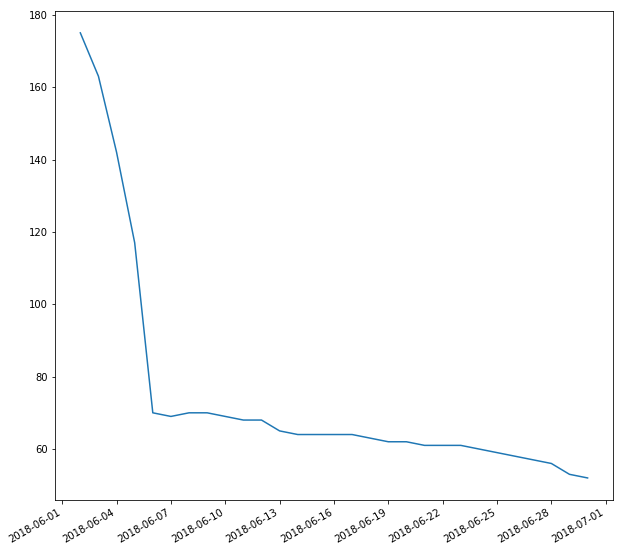

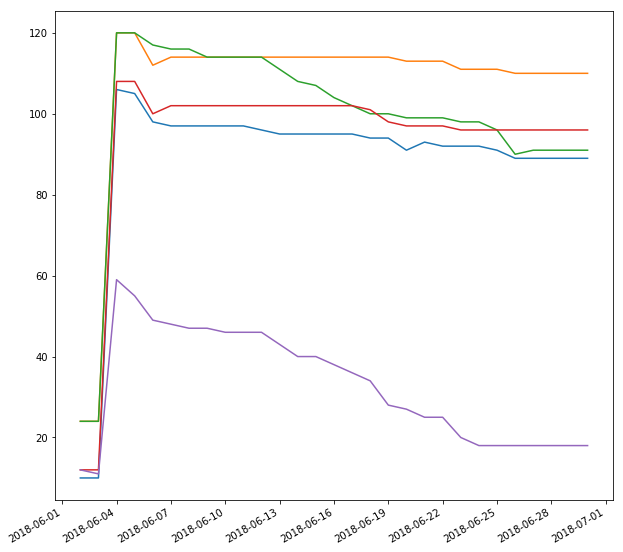

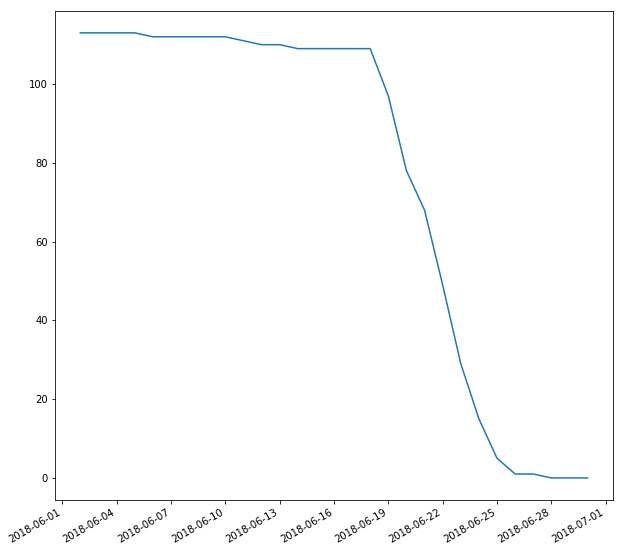

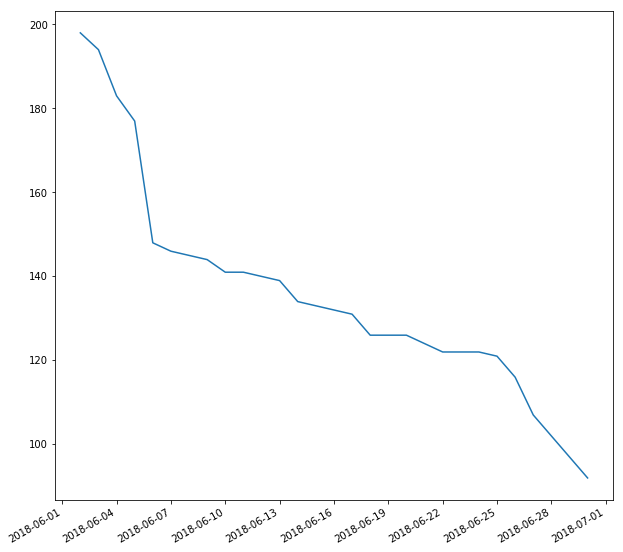

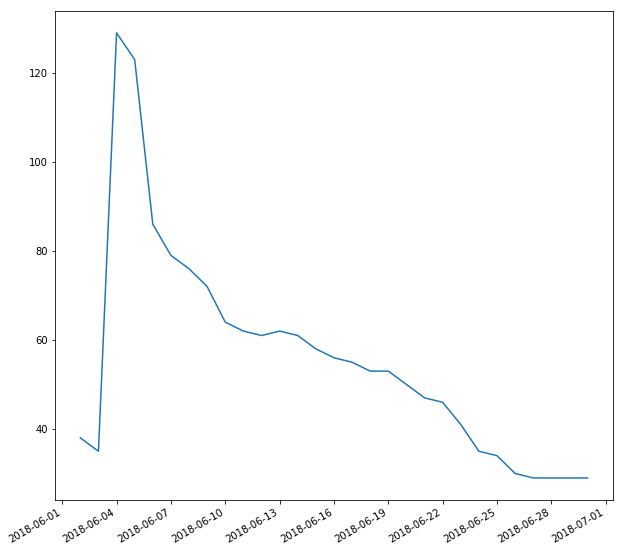

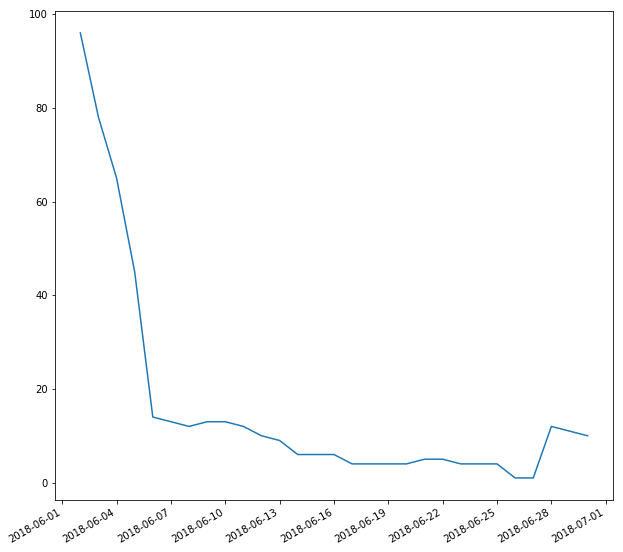

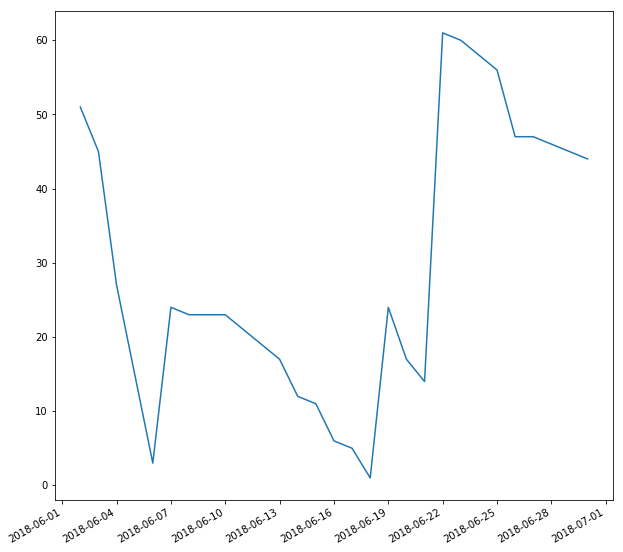

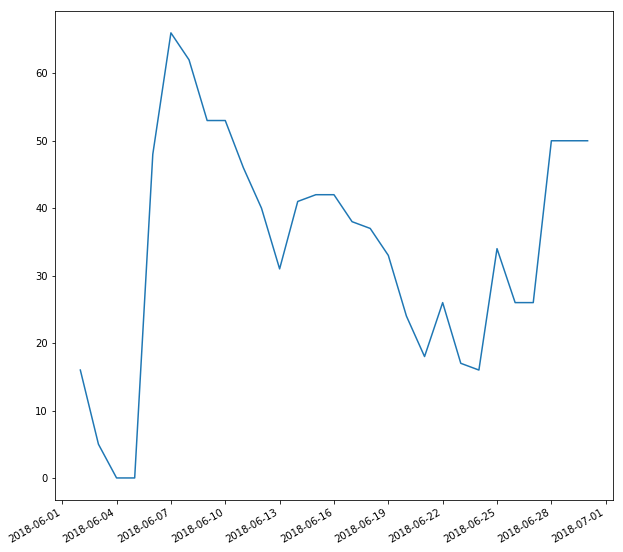

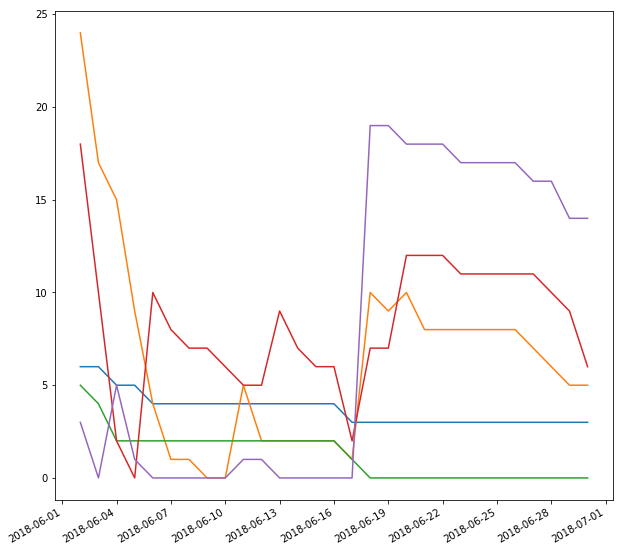

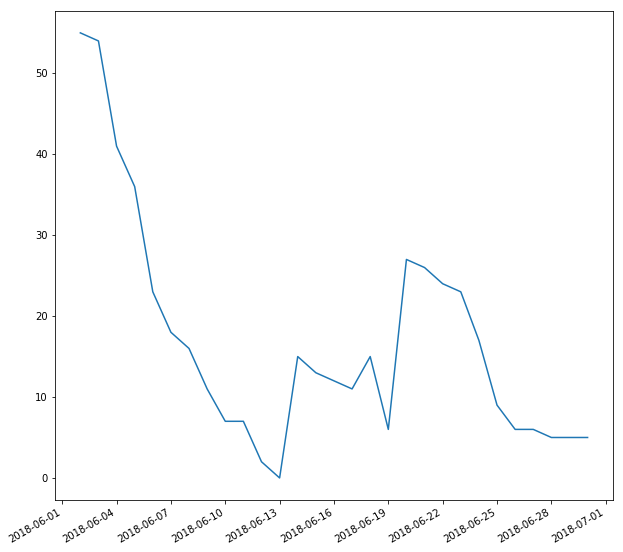

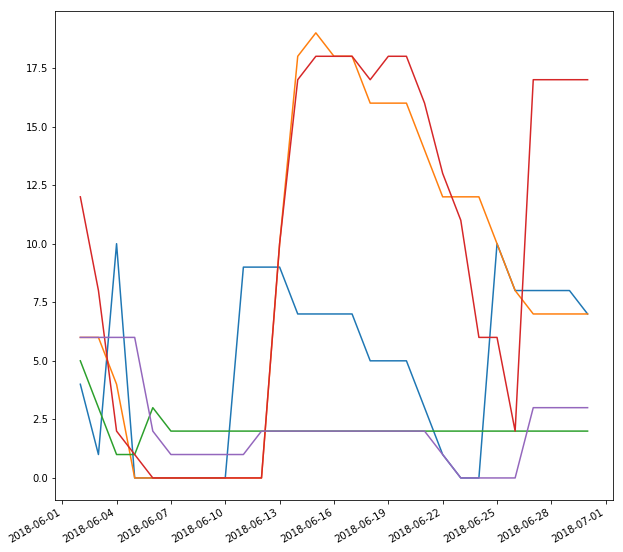

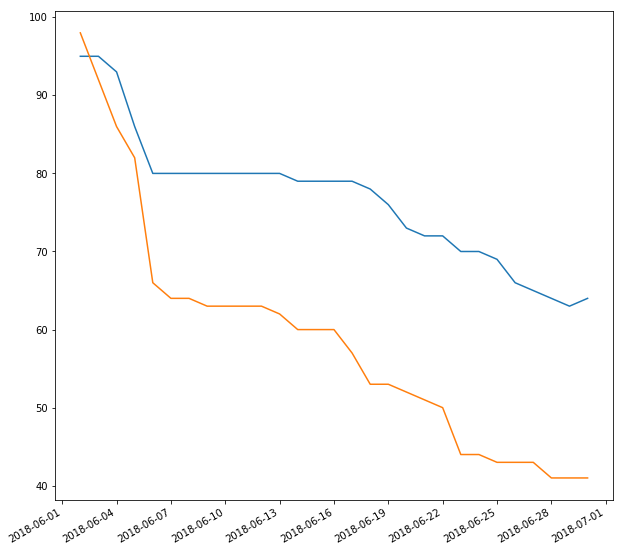

In [224]:
for index, row in target1[target1.GOODS_NAME.isin(final1[final1.MAX_FREQ==1].GOODS_NAME)].iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    temp = temp[temp.STOCK_ID.isin(temp.groupby("STOCK_ID").SELL_AMOUNT.sum().sort_values(ascending=False).index[:5])]
    plt.figure(figsize=(10,10))
    for _, group in temp.groupby('STOCK_ID'):
        group = group[-group.STOCK_AMOUNT.isnull()]
        plt.plot(pd.to_datetime(group.COLLECT_DAY), group.STOCK_AMOUNT)
    plt.gcf().autofmt_xdate()
    plt.savefig('PLOTS0802/TOP5/GSSHOP:%s_%s.png'%(row.ITEM_ID, row.GOODS_NAME.replace("/", "_")))
for index, row in target2[target2.GOODS_NAME.isin(final2[final2.MAX_FREQ==1].GOODS_NAME)].iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    temp = temp[temp.STOCK_ID.isin(temp.groupby("STOCK_ID").SELL_AMOUNT.sum().sort_values(ascending=False).index[:5])]
    plt.figure(figsize=(10,10))
    for _, group in temp.groupby('STOCK_ID'):
        group = group[-group.STOCK_AMOUNT.isnull()]
        plt.plot(pd.to_datetime(group.COLLECT_DAY), group.STOCK_AMOUNT)
    plt.gcf().autofmt_xdate()
    plt.savefig('PLOTS0802/TOP5/HMALL:%s_%s.png'%(row.ITEM_ID, row.GOODS_NAME.replace("/", "_")))
for index, row in target3[target3.GOODS_NAME.isin(final3[final3.MAX_FREQ==1].GOODS_NAME)].iterrows():
    temp = data[(data.ITEM_ID==row.ITEM_ID)&(data.SITE_NO==row.SITE_NO)]
    temp = temp[temp.STOCK_ID.isin(temp.groupby("STOCK_ID").SELL_AMOUNT.sum().sort_values(ascending=False).index[:5])]
    plt.figure(figsize=(10,10))
    for _, group in temp.groupby('STOCK_ID'):
        group = group[-group.STOCK_AMOUNT.isnull()]
        plt.plot(pd.to_datetime(group.COLLECT_DAY), group.STOCK_AMOUNT)
    plt.gcf().autofmt_xdate()
    plt.savefig('PLOTS0802/TOP5/OLIVEYOUNG:%s_%s.png'%(row.ITEM_ID, row.GOODS_NAME.replace("/", "_")))